# Student Grades Prediction Project

### Project Description

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description- total 43 columns
-Seat No: The enrolled number of candidates that took the exams

CGPA: The cumulative GPA based on the four-year total grade progress of each candidate. CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the candidate took exam



#### Predict :
CGPA of a student based on different grades in four years.

### Let's Import majorly required Libraries and Later lets import based on requirements

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Enable Grid Automatically
sns.set_style('darkgrid')

#Set Run time configuration font size =15
plt.rcParams['font.size']=15


#Set Run time configuration figure size = (15,8)
plt.rcParams['figure.figsize']=(15,8)

#Set Run Time configuration parameters of back ground Pink color in HEX 
plt.rcParams['figure.facecolor']='#FFB6C1'

### Import the Data set

In [3]:
# Lets Import Data set using the link given in the project description and read it to see number of Rows x Columns
grades=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
grades

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  ...     C-     C-     C-     C-     A-      A     C-      B   
1       D+  ...     D+      D      C      D     A-     B-      C      C   
2       A-  ...      B      B      A      C      A      A      A     A-   
3        D  ...     D+      C     D+     C-     B-      B     C+     C+   
4        A  ...     B-     B+     B+     B-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
0       A-  2.205  
1        B  2.008  
2        A  3.608  
3       C+  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[571 rows x 43 columns]

In [4]:
#Lets check head of the DataFrame retrieved using grades.head()
grades.head(6)

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   
5  CS-97006      A     B-      B        D+     C+     A-     C+      B     B+   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  
5  ...      C     B-     C+     C+     A-     A-     B+     B-      B  3.026  

[6 rows x 43 columns]

In [5]:
#Lets check tail of the DataFrame retrieved using grades.tail()
grades.tail()

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[5 rows x 43 columns]

For the Model Building and finding issues with the data set at various locations and phases we need to do Exploratory Data Analysis (EDA). For that First, Let's start with Non-Graphical Analysis

## Exploratory Data Analysis (EDA)

### Non-Graphical Analysis

In [6]:
#Let's check the dimensions of the data set using shape 
grades.shape

(571, 43)

The Dataset contains 571 rows and 43 columns containing various values corresponding to the data

In [7]:
#Let's check the names of the Columns for later usage
grades.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

Since the column names are contains subject name and numbers representing the year or course number,
CGPA is the column giving total Final Grade, which is our Target Variable

In [8]:
#checking the dimensions of the internet 
grades.columns.tolist()

['Seat No.',
 'PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412',
 'CGPA']

Just representing the names of the columns as a single list

In [9]:
#Let's check the data types of the columns
grades.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

We can observe that out of all the columns, Except CGPA all the other columns are of Object data type since they're grades in letters.
But CGPA is the numerical value and in FLOAT data type.
Whereas we can ignore or drop the Seat No. Column, because it doesn't support any information except as Serial Number

### Checking the Null Values

In [10]:
#Checking the Null Values
grades.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

We can observe that there are many columns which has NULL Values, but we need to handle them in different way since they're object data type.
Similarly lets confirm the same by using total count of null values

In [11]:
#Check the Sum of NULL Values in the total DataFrame
grades.isnull().sum().sum()

425

TOtally 425 NULL Values are there in the Data Set, which we need to handle

### We can also see actually what % of data is missed

In [12]:
# We know there's no null values, but lets see the %
total = grades.isnull().sum().sort_values(ascending=False)
percent_1 = grades.isnull().sum()/grades.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

Total     %
CS-406        85  14.9
CS-412        79  13.8
CS-423        14   2.5
CS-414        13   2.3
CS-419        13   2.3
CS-317        12   2.1
CS-421        12   2.1
CS-403        12   2.1
TC-383        10   1.8
EF-303        10   1.8
HS-304        10   1.8
CS-301        10   1.8
CS-302        10   1.8
CS-312        10   1.8
MT-442        10   1.8
MT-331         9   1.6
EL-332         9   1.6
CS-318         9   1.6
CS-306         9   1.6
EE-222         7   1.2
MT-224         7   1.2
CS-210         7   1.2
CS-212         6   1.1
CS-215         6   1.1
EE-217         6   1.1
CS-214         6   1.1
CS-203         5   0.9
CS-211         5   0.9
MT-222         5   0.9
HS-205/20      5   0.9
CS-107         2   0.4
ME-107         2   0.4
EE-119         2   0.4
EL-102         2   0.4
CS-106         2   0.4
MT-111         2   0.4
HS-105/12      1   0.2
CY-105         1   0.2
Seat No.       0   0.0
PH-121         0   0.0
CS-105         0   0.0
HS-101         0   0.0
CGPA           0   0.0

We can see that CS-406 is having highest Percentage of NULL values and others follows.

<Axes: >

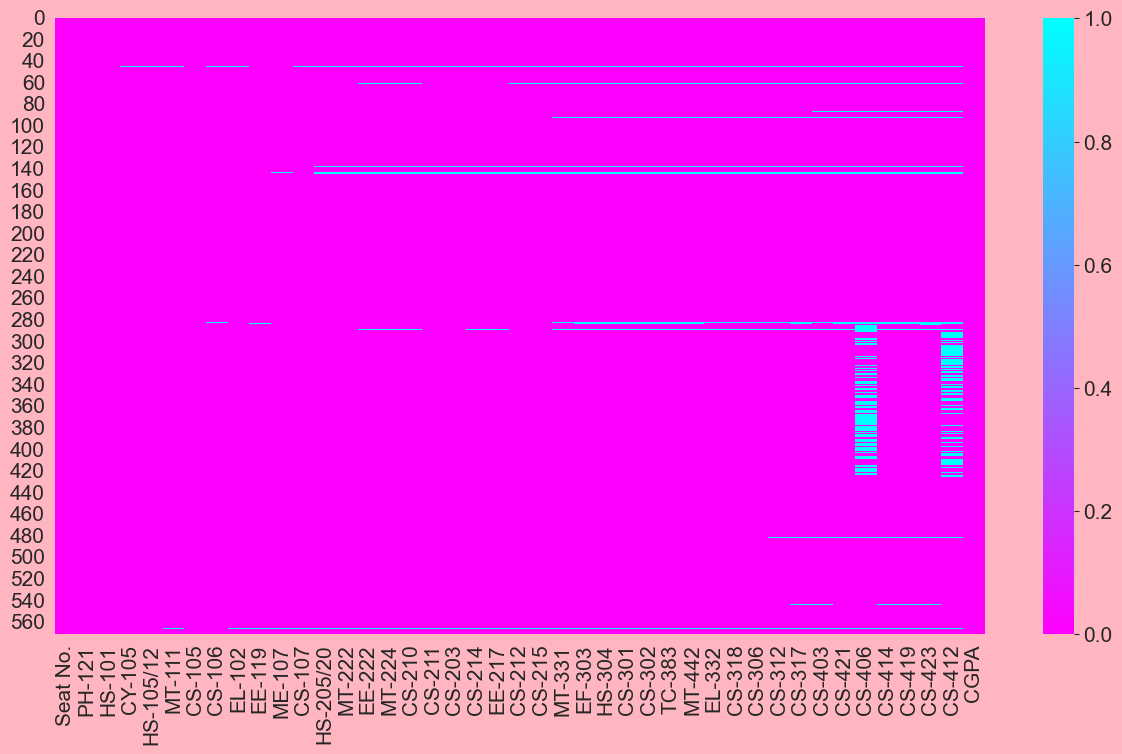

In [13]:
#Let's see the confirmation of No NULL Values with a heatmap
sns.heatmap(grades.isnull(), cmap='cool_r')

From the Heatmap also, it's very clearly that, there are many NULL Values in the given data set. Hence we need to replace NULL values


#### Get the Complete Information about Dataset

In [14]:
#Fetching the information about the DataFrame with Non Null Values and Data Type of the Column
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

We have already looked at the information and NULL values earlier and this is a simple way to reiterate and check the information clearly.

We can see that, only CGPA column is of float data type, all others are of Object data type. The dataset has 571 values and 42 features + the target variable (CGPA). Memory Size is about 191.9+ KB

###  Let's check the unique values and all the information in each column

In [15]:
#Gives Unique Values
grades['CGPA'].unique()

array([2.205, 2.008, 3.608, 1.906, 3.448, 3.026, 2.957, 3.043, 3.358,
       3.247, 2.681, 3.281, 2.792, 3.523, 3.443, 2.777, 3.248, 1.787,
       3.572, 3.483, 2.246, 2.956, 2.953, 3.586, 3.475, 2.228, 3.44 ,
       2.188, 3.195, 2.294, 3.133, 3.22 , 3.112, 3.16 , 3.019, 3.164,
       3.332, 2.165, 3.7  , 3.033, 2.696, 2.851, 3.058, 1.493, 2.069,
       1.996, 3.897, 3.848, 3.404, 2.254, 2.655, 3.106, 2.793, 3.023,
       3.01 , 3.4  , 1.899, 3.168, 2.57 , 2.418, 2.564, 2.468, 3.769,
       2.999, 2.768, 2.822, 3.189, 2.715, 3.578, 3.49 , 2.805, 3.458,
       2.34 , 3.252, 2.683, 3.378, 3.295, 3.193, 3.647, 2.815, 2.171,
       3.761, 2.763, 2.938, 2.06 , 1.261, 2.378, 2.861, 2.363, 2.084,
       1.38 , 1.89 , 3.861, 1.805, 3.925, 3.919, 3.258, 3.963, 2.396,
       3.772, 1.768, 3.176, 3.335, 3.758, 3.208, 1.845, 3.946, 2.3  ,
       3.759, 3.516, 2.087, 3.137, 2.011, 2.566, 1.993, 3.334, 2.056,
       2.552, 2.028, 2.58 , 3.651, 2.928, 2.659, 3.174, 3.03 , 2.208,
       2.698, 2.823,

we can observe that there are many types of grades predictions are availble. Among them we need to classify based on different factors.

In [16]:
#Gives Unique Values
grades['CGPA'].nunique()

491

Out of total 571 values, 491 different classes are available within the Target variable

In [17]:
#checking the nunique values in all columns
grades.nunique()

Seat No.     571
PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
CGPA         491
dtype: int64

The Seat No. field has 571 distinct values, so we may remove it.

In [18]:
grades.drop(['Seat No.'],axis=1, inplace=True)
grades

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119 ME-107  \
0       B-     D+     C-         C     C-     D+      D     C-     B-     C-   
1        A      D     D+         D     B-      C      D      A     D+      D   
2        A      B      A        B-     B+      A     B-     B+     A-     A-   
3        D     C+     D+         D      D     A-     D+     C-      D     C+   
4       A-     A-     A-        B+      A      A     A-     B+      A     A-   
..     ...    ...    ...       ...    ...    ...    ...    ...    ...    ...   
566      B      A      A        A-     A+      A     A-     A-     A+     B+   
567     A+      A      A         A      A      A      A     A-      A      A   
568      B      A     A-        B+      A      A      A      A      A      B   
569      A     B+      D         A      D     D+     B-     C-     B-     C-   
570      C      D      D         C      C     D+      B     C+      C     D+   

     ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0    ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1    ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2    ...      B      B      A      C      A      A      A     A-      A  3.608  
3    ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4    ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
566  ...     A-     A-      A      A      A     B+     B+      B      A  3.798  
567  ...     B+     B+      A      A     A-      B     A-      C     A-  3.772  
568  ...     A-      B      A     B+      A      C     B+     A-     A-  3.470  
569  ...      D      B      B     C-      D      C      B     B-      C  2.193  
570  ...     C+      C     B-      D      F     C-     B+      D     C-  1.753  

[571 rows x 42 columns]

In [19]:
#Checking the value counts of each Column
for i in grades.columns:
    print(grades[i].value_counts())
    print("\n")

A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64


A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64


A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64


A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64


A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64


A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: CS-105, dtype: int64


A-    116
B+    101
B      96
A      56
B-     54
C+     41
D+     29
C-     27
D      24
C      1

We can observe that, the column ID has all the unique values simply representing a serial numbers and we can drop it as there's no role of  it in predicting the type of grades.

All the other chemical components has different lengths and many unique values. but each value corresponds in a different way.

The column CGPA is having 6 different unique values, where type 2 are of 76 combinations, and similarly all other types have different lengths.
type 6 has less unique values compared to others.

### Let's GO for Handling NULL Values

In [20]:
#returns counts of values with null in each column
grades.isnull().sum() 

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [21]:
# Let's find records with null values for an example of subject HS-205/20
grades[grades['HS-205/20'].isnull()]

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119 ME-107  \
44       D      C    NaN       NaN    NaN     C-    NaN    NaN     D+     WU   
137     C-     C+     WU        WU     WU      B     WU     WU     A-     C+   
142     C+     B-      B        A-      A     A-      C     WU     A-    NaN   
143      D      D     WU        WU     WU      D     WU     WU      D     WU   
565      F      F      D        C-    NaN     D+      D    NaN    NaN    NaN   

     ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
44   ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  1.493  
137  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  2.653  
142  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  2.943  
143  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  1.000  
565  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  0.800  

[5 rows x 42 columns]

Since the subject HS-205/20 has 5 NULL Values, we can see all the places or locations where the NULL values are present in the dataframe can be listed there.

    Similarly we can check for some other subjects also.. lets see for other subject and go for replacing them with MODE 
    value since these are categorical data.

In [22]:
# Let's find records with null values for an example of subject CS-412
grades[grades['CS-412'].isnull()]

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119 ME-107  \
44       D      C    NaN       NaN    NaN     C-    NaN    NaN     D+     WU   
60       C     B+     WU        D+     C-     B-      F      D     A-      B   
86       D      D     D+        B-      F      D      D      D     D+     D+   
91      WU     C-      D         D     WU      D      D      D      C     D+   
137     C-     C+     WU        WU     WU      B     WU     WU     A-     C+   
..     ...    ...    ...       ...    ...    ...    ...    ...    ...    ...   
420      A      A     C+         A     C+     B+     A-     A+     A-     B+   
423      D     D+      D         D     C-      C     C+     B-      C      C   
424     C-     D+     B-        C+     D+     C-     A-     C-     D+     D+   
481     B-     A-     C+         D      B      B     A-     A-      C      D   
565      F      F      D        C-    NaN     D+      D    NaN    NaN    NaN   

     ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
44   ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  1.493  
60   ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  2.418  
86   ...     D+      D    NaN    NaN    NaN    NaN    NaN    NaN    NaN  1.261  
91   ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  1.380  
137  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  2.653  
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
420  ...     A+     A-     A-      A     B+      A      B      A    NaN  3.356  
423  ...      D      D     D+      D      D      W      C      B    NaN  1.747  
424  ...      W      C     B-      F     D+      W      D      B    NaN  1.835  
481  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  1.896  
565  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  0.800  

[79 rows x 42 columns]

In [23]:
#Let's replace all the NUll values in the DataFrame by their MODE value as for categorical data
grades.fillna(grades.mode().iloc[0], inplace=True)

In [24]:
#Let's check the counts of values with null in each column after replacing with Mode
grades.isnull().sum() 

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

We can observe that we have removed all the NULL values and now the NULL values are not present in the DataFrame

we can also check the same for the total data by using info method

In [25]:
#Fetching the information about the DataFrame with Non Null Values and Data Type of the Column
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    object 
 2   CY-105     571 non-null    object 
 3   HS-105/12  571 non-null    object 
 4   MT-111     571 non-null    object 
 5   CS-105     571 non-null    object 
 6   CS-106     571 non-null    object 
 7   EL-102     571 non-null    object 
 8   EE-119     571 non-null    object 
 9   ME-107     571 non-null    object 
 10  CS-107     571 non-null    object 
 11  HS-205/20  571 non-null    object 
 12  MT-222     571 non-null    object 
 13  EE-222     571 non-null    object 
 14  MT-224     571 non-null    object 
 15  CS-210     571 non-null    object 
 16  CS-211     571 non-null    object 
 17  CS-203     571 non-null    object 
 18  CS-214     571 non-null    object 
 19  EE-217     571 non-null    object 
 20  CS-212    

Now we can see that, there are no NULL Values and the data types are same. all the columns contains same number of ELements without any NULL values

    Since, CGPA column is our target variable and no need to analyse for any other skew, ourlier or any othe deatils. so let's go for dropping it and do tha analysis on the remianig data

In [26]:
x=grades.drop(['CGPA'], axis=1) # removing the CGPA column to examine the values in the other columns
counts = x.stack().value_counts()

In [27]:
# Let us see & count the maximum number of each grade values present throughout the rows
pd.set_option('display.max_rows', None)
print(counts)

A-    4644
A     3535
B+    2724
B     2702
B-    2221
C     1612
C+    1556
C-    1341
D+    1141
D     1023
A+     726
F      121
WU      41
W       21
I        3
dtype: int64


We can Observe from the above method that, we have almsot 15 different Grading options in the DataFrame.

SO, let us assume and give some numerical values for each Grade to go for further Analysis.
in that case, let's take highest Grading point A=15 and the last one WU=1 and make the remianig process

### LABELING the Grade points

In [28]:
#From 1 to 15, where 1 denotes the gradepoint's lowest weighting and 15 its greatest.

X = {'A+': 15, 'A': 14, 'A-': 13, 'B+': 12, 'B': 11, 'B-': 10,
    'C+': 9, 'C': 8, 'C-': 7, 'D+': 6, 'D': 5, 'F': 4,
     'I' : 3, 'W': 2, 'WU': 1}
                
x = x.replace(X)

In [29]:
#Reset the values for Grades in all the ROWS
pd.reset_option('display.max_rows')

In [30]:
#Let's Check if the DataFrame Rows have been modified or not
x

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0        10       6       7          8       7       6       5       7   
1        14       5       6          5      10       8       5      14   
2        14      11      14         10      12      14      10      12   
3         5       9       6          5       5      13       6       7   
4        13      13      13         12      14      14      13      12   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566      11      14      14         13      15      14      13      13   
567      15      14      14         14      14      14      14      13   
568      11      14      13         12      14      14      14      14   
569      14      12       5         14       5       6      10       7   
570       8       5       5          8       8       6      11       9   

     EE-119  ME-107  ...  CS-306  CS-312  CS-317  CS-403  CS-421  CS-406  \
0        10       7  ...       8       7       7       7       7      13   
1         6       5  ...       5       6       5       8       5      13   
2        13      13  ...      13      11      11      14       8      14   
3         5       9  ...       7       6       8       6       7      10   
4        14      13  ...      13      10      12      12      10      13   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566      15      12  ...      12      13      13      14      14      14   
567      14      14  ...      13      12      12      14      14      13   
568      14      11  ...      12      13      11      14      12      14   
569      10       7  ...      12       5      11      11       7       5   
570       8       6  ...       6       9       8      10       5       4   

     CS-414  CS-419  CS-423  CS-412  
0        14       7      11      13  
1        10       8       8      11  
2        14      14      13      14  
3        11       9       9       9  
4        14      13      13      14  
..      ...     ...     ...     ...  
566      12      12      11      14  
567      11      13       8      13  
568       8      12      13      13  
569       8      11      10       8  
570       7      12       5       7  

[571 rows x 41 columns]

We can observe that in all of the rows and columns, every single grade point has been replacedd with corresponding 
labelled values. 

So, Now we can use this for further analysis, since all the categorical columns have been modified to Numerical columns.

the same can also be done by changing the data types of each columns to FLOAT or INT

#### Create another DataFrame to hadnle Numerical Data and Keep Original data in Original DataFrame "grades"

In [31]:
GRADES=x # x contains all the subject except CGPA
GRADES['CGPA']=grades['CGPA'] # Append CGPA column to the new DataFrame without the Seat No.
GRADES # Display the DataFrame with labelled data

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0        10       6       7          8       7       6       5       7   
1        14       5       6          5      10       8       5      14   
2        14      11      14         10      12      14      10      12   
3         5       9       6          5       5      13       6       7   
4        13      13      13         12      14      14      13      12   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566      11      14      14         13      15      14      13      13   
567      15      14      14         14      14      14      14      13   
568      11      14      13         12      14      14      14      14   
569      14      12       5         14       5       6      10       7   
570       8       5       5          8       8       6      11       9   

     EE-119  ME-107  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0        10       7  ...       7       7       7       7      13      14   
1         6       5  ...       6       5       8       5      13      10   
2        13      13  ...      11      11      14       8      14      14   
3         5       9  ...       6       8       6       7      10      11   
4        14      13  ...      10      12      12      10      13      14   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566      15      12  ...      13      13      14      14      14      12   
567      14      14  ...      12      12      14      14      13      11   
568      14      11  ...      13      11      14      12      14       8   
569      10       7  ...       5      11      11       7       5       8   
570       8       6  ...       9       8      10       5       4       7   

     CS-419  CS-423  CS-412   CGPA  
0         7      11      13  2.205  
1         8       8      11  2.008  
2        14      13      14  3.608  
3         9       9       9  1.906  
4        13      13      14  3.448  
..      ...     ...     ...    ...  
566      12      11      14  3.798  
567      13       8      13  3.772  
568      12      13      13  3.470  
569      11      10       8  2.193  
570      12       5       7  1.753  

[571 rows x 42 columns]

Now, here we can see that, 

    the dataframe "grades" contains the original data /information
    DataFrame "GRADES" contains the same data with the labelled detailed information in numeical values

Text(0.5, 1.0, 'Distribution of subject PH-121 and its Skewness')

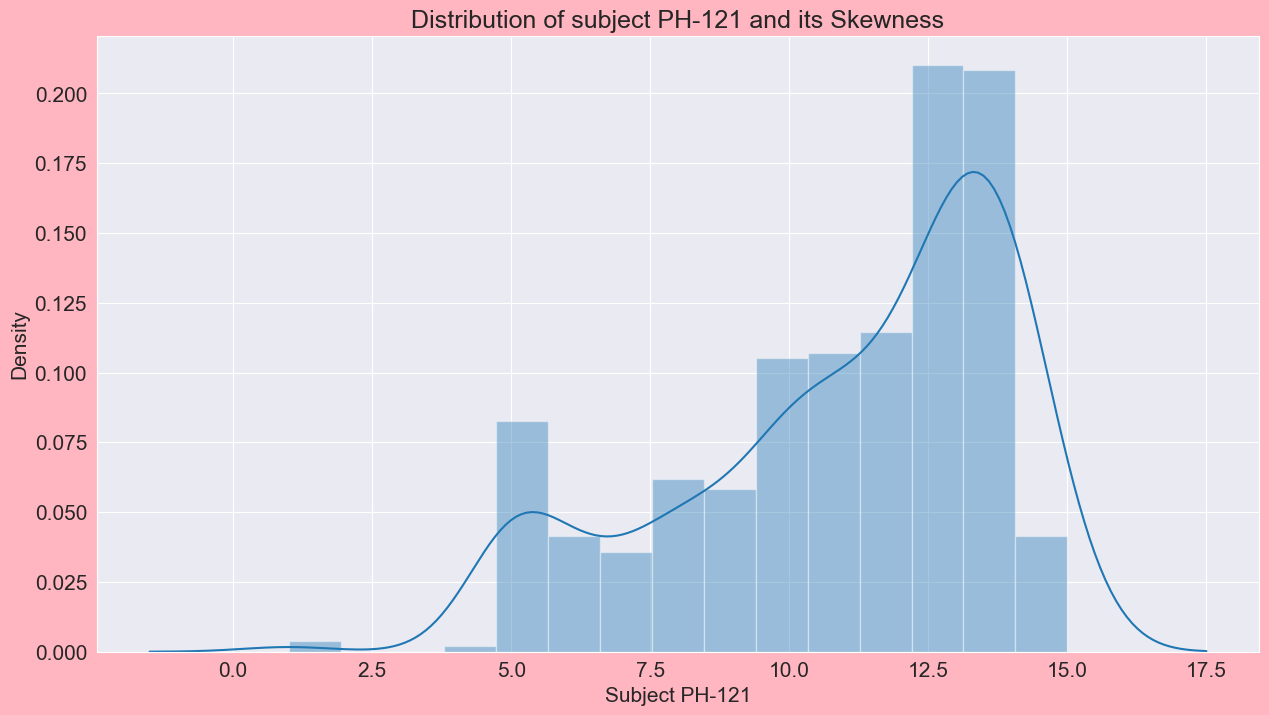

In [32]:
plt.figure(figsize=(15,8))
sns.distplot(x=GRADES['PH-121'])
plt.xlabel('Subject PH-121')
plt.title('Distribution of subject PH-121 and its Skewness')

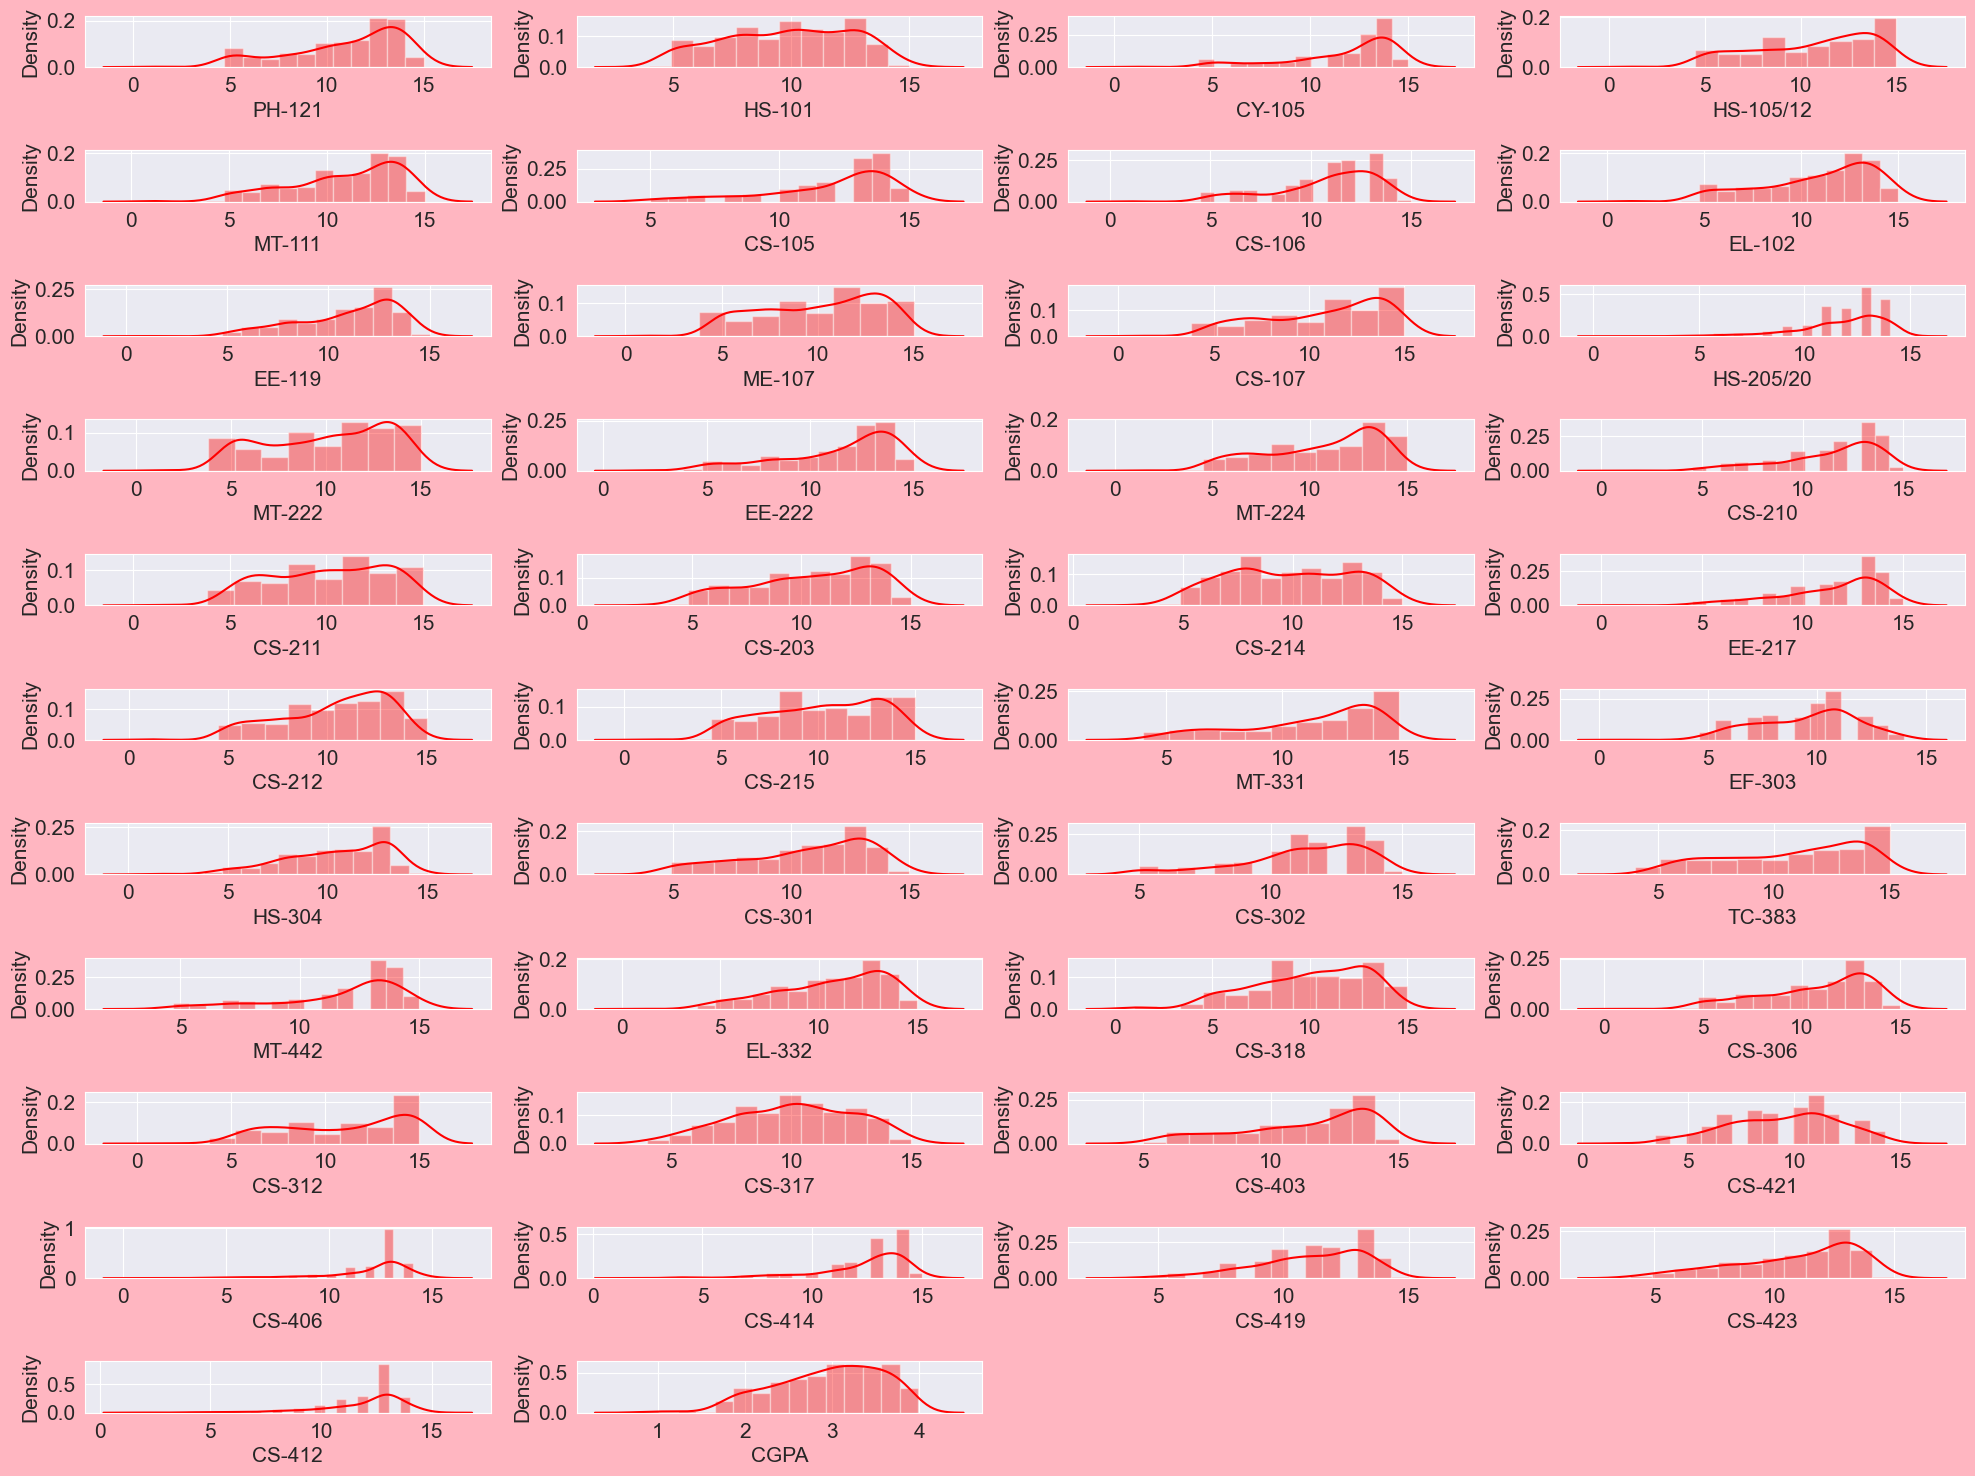

In [33]:
 #Let's Plot Distribution plots for each subject for each column in the DataFrame
count = 1
plt.figure(figsize=(20,15))
for i, value in GRADES.items():
    if count<=43:
        ax=plt.subplot(11, 4, count)
        sns.distplot(value, hist=True, color="r")
    count += 1
plt.tight_layout()
plt.show()

We can observe teh Skewness in each of the subject

### Let's Plot DENSITY plot to see skewness

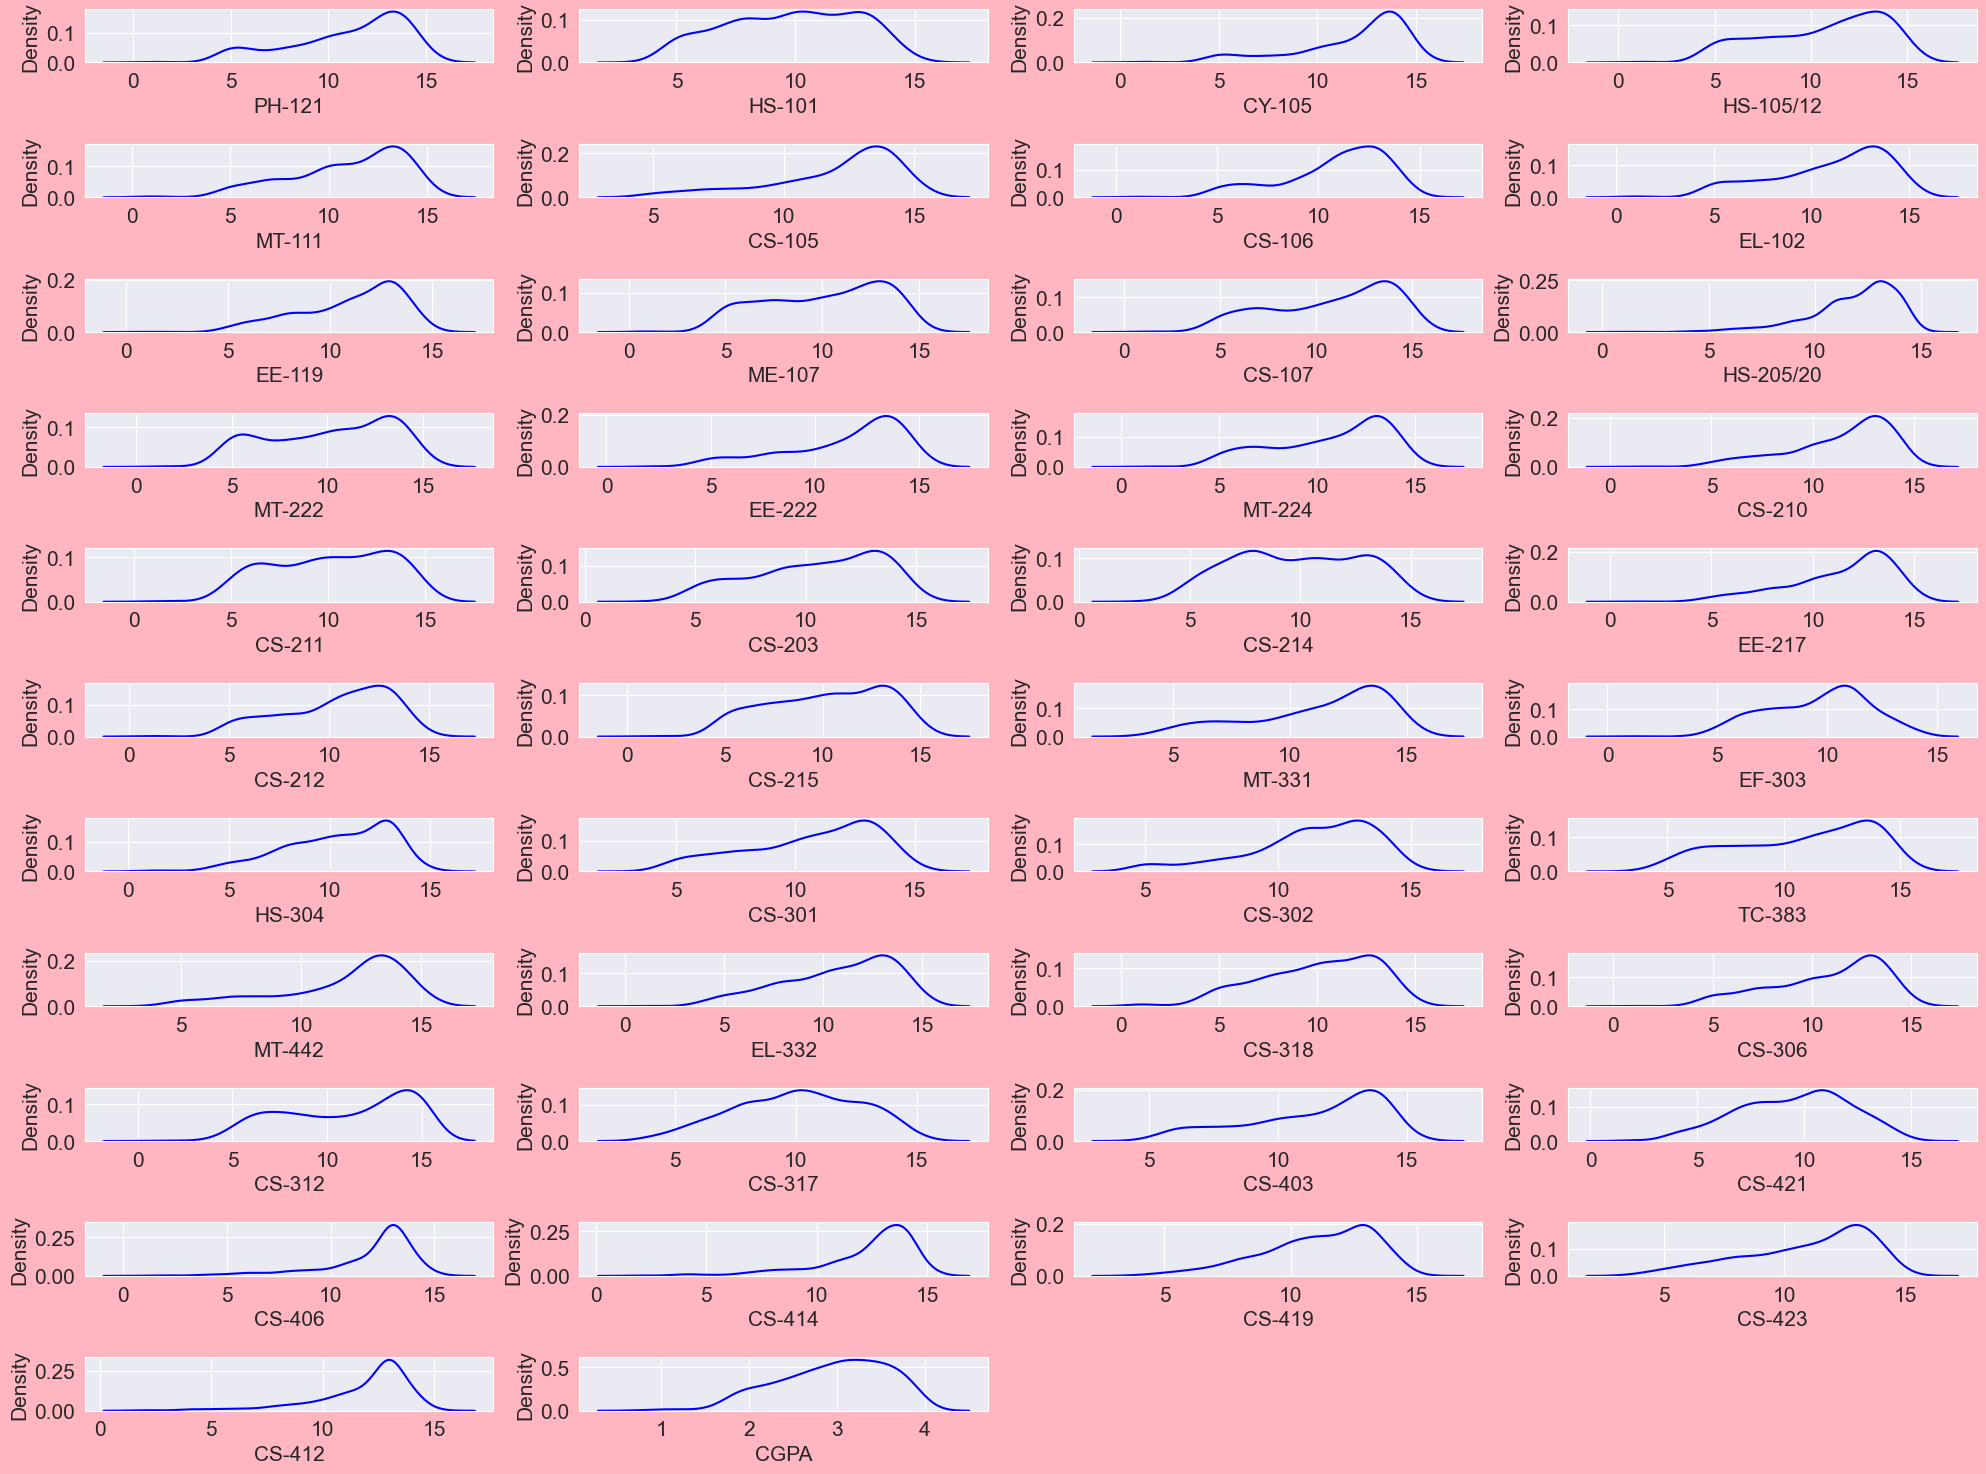

In [34]:
count = 1
plt.figure(figsize=(20,15))
for i, value in GRADES.items():
    if count<=43:
        ax=plt.subplot(11, 4, count)
        sns.kdeplot(value, color="b")
    count += 1
plt.tight_layout()
plt.show()

We can see that, almost all the data is little bit right skewed in the above graphs

<Axes: >

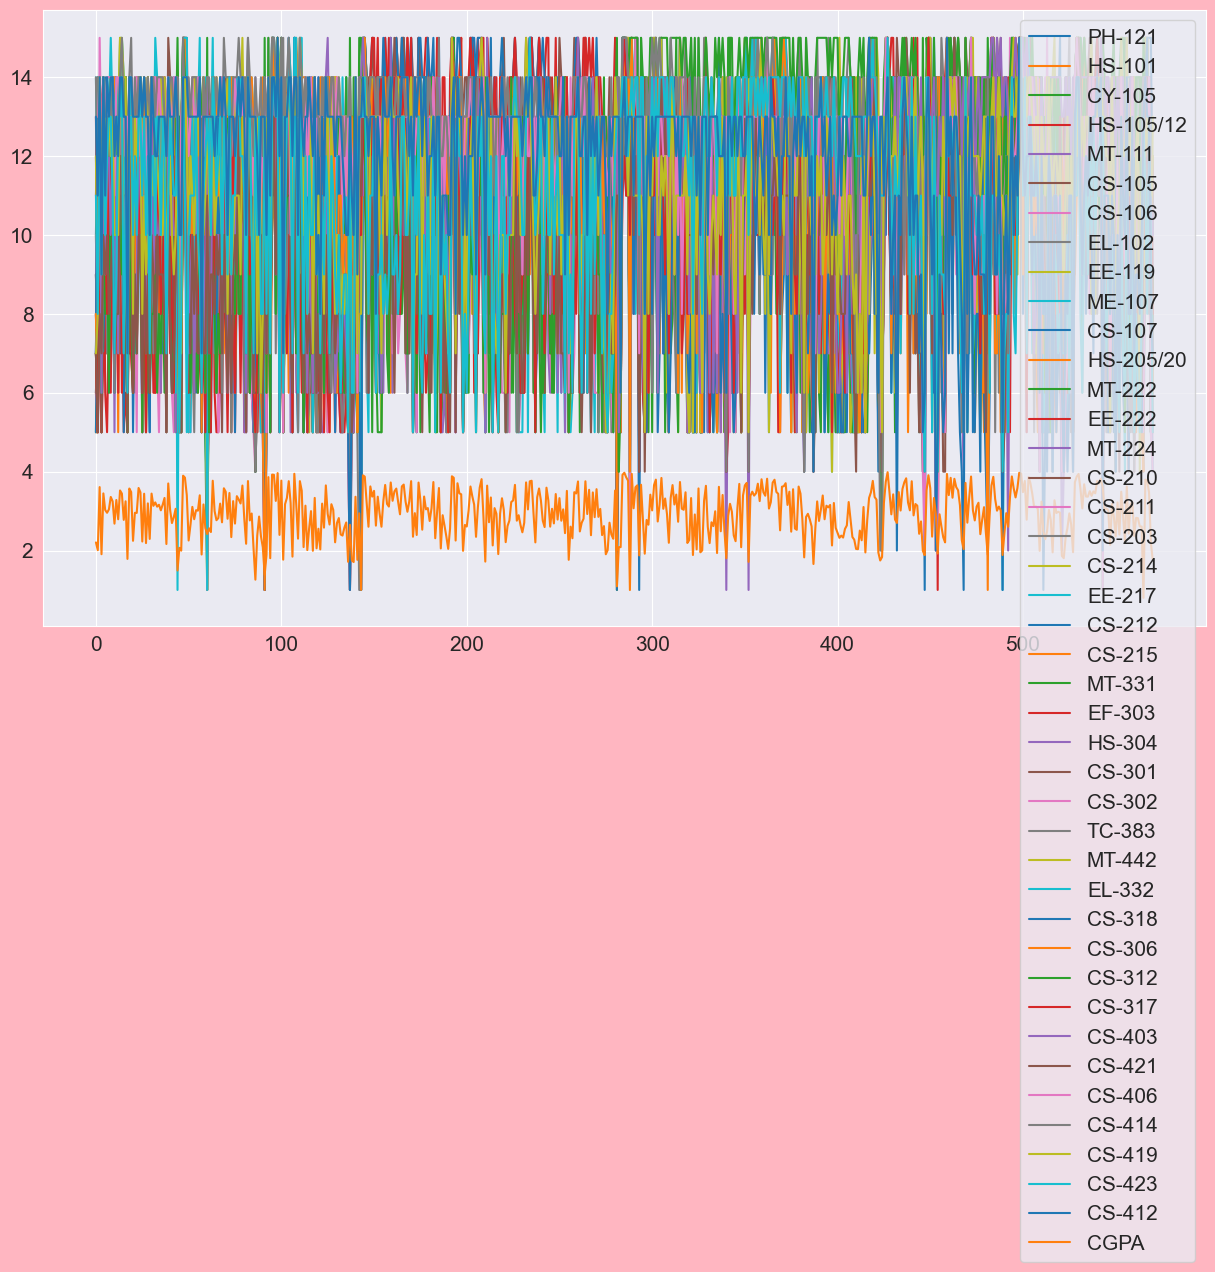

In [35]:
GRADES.plot.line(y=['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412','CGPA'], figsize=(15,8))

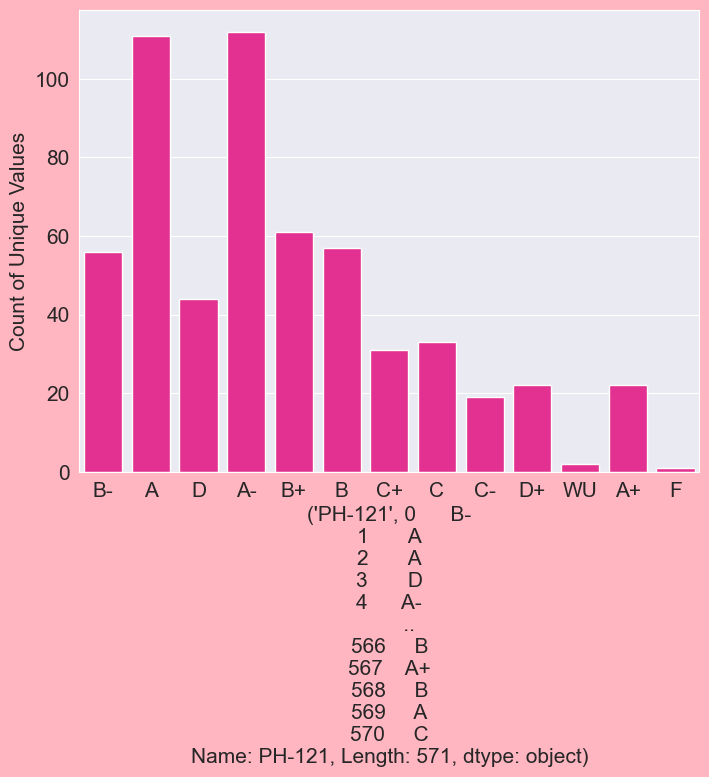

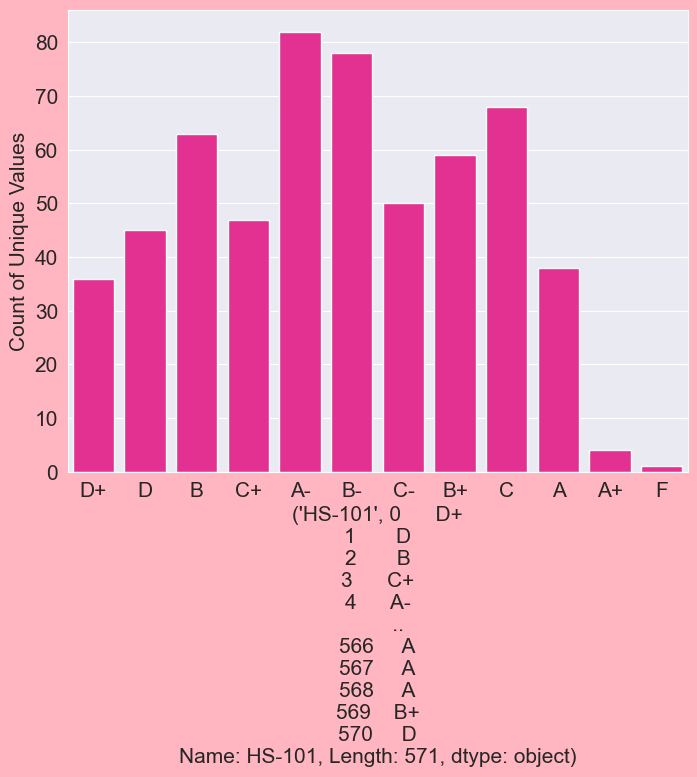

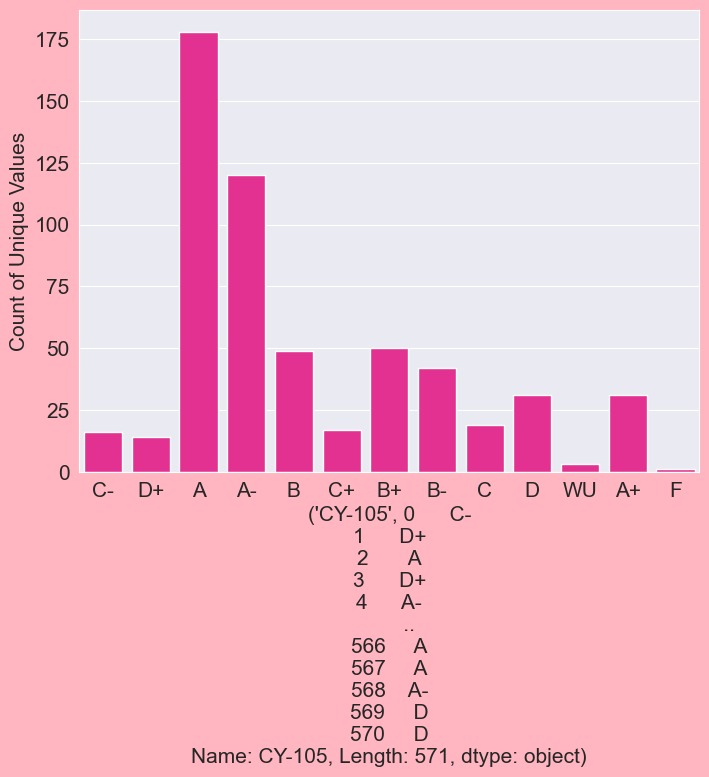

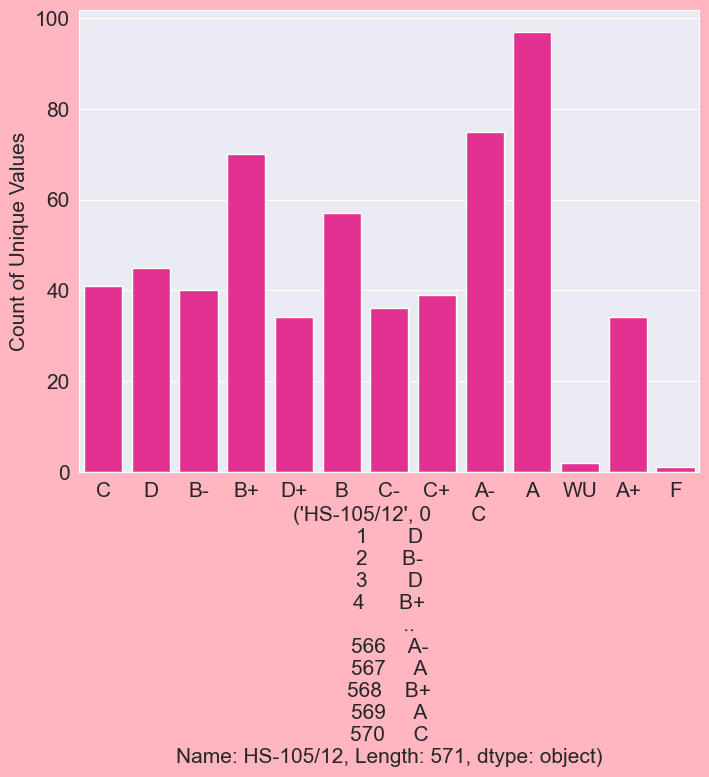

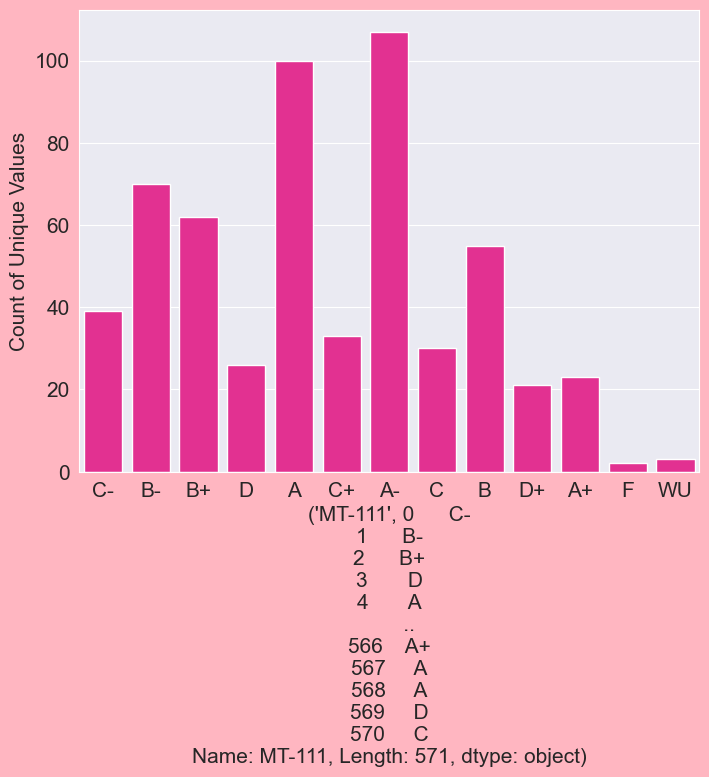

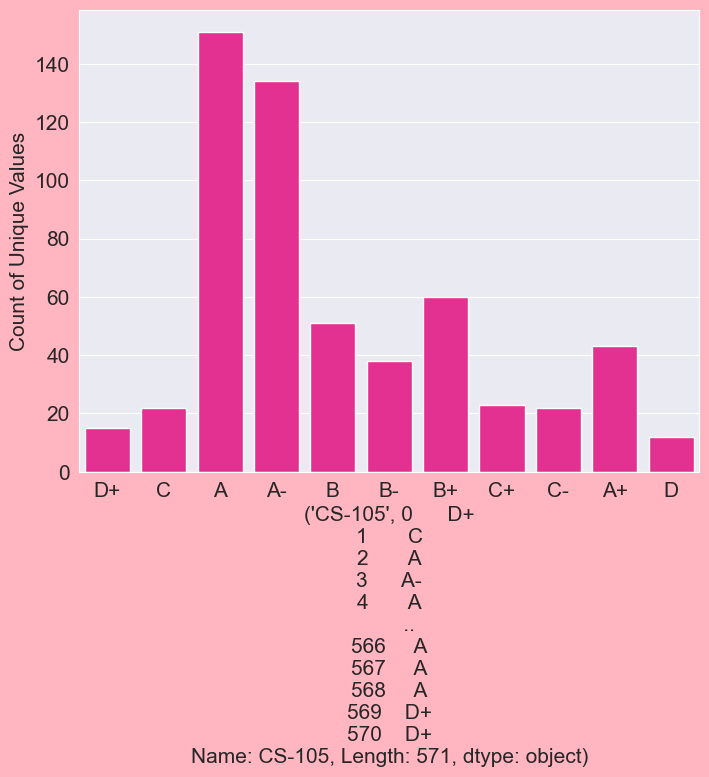

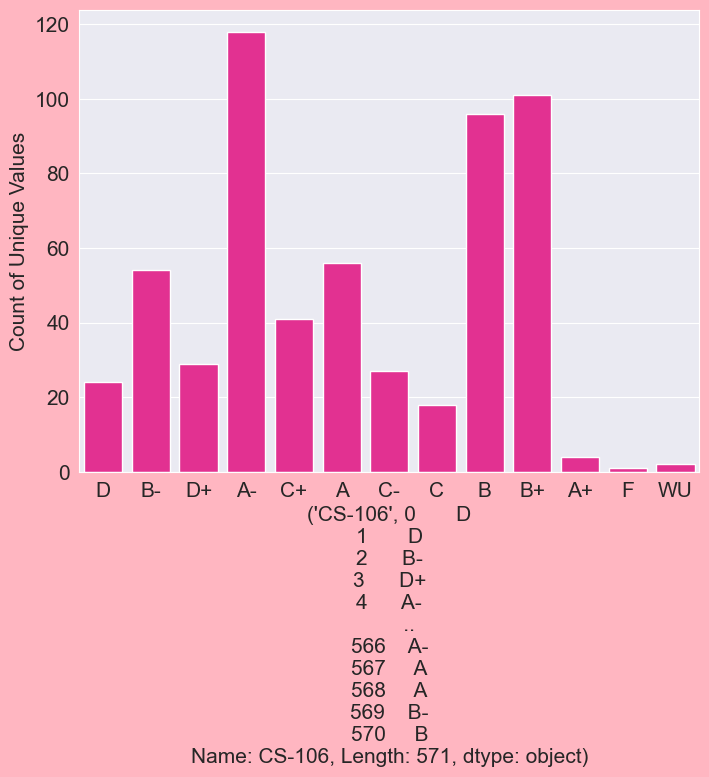

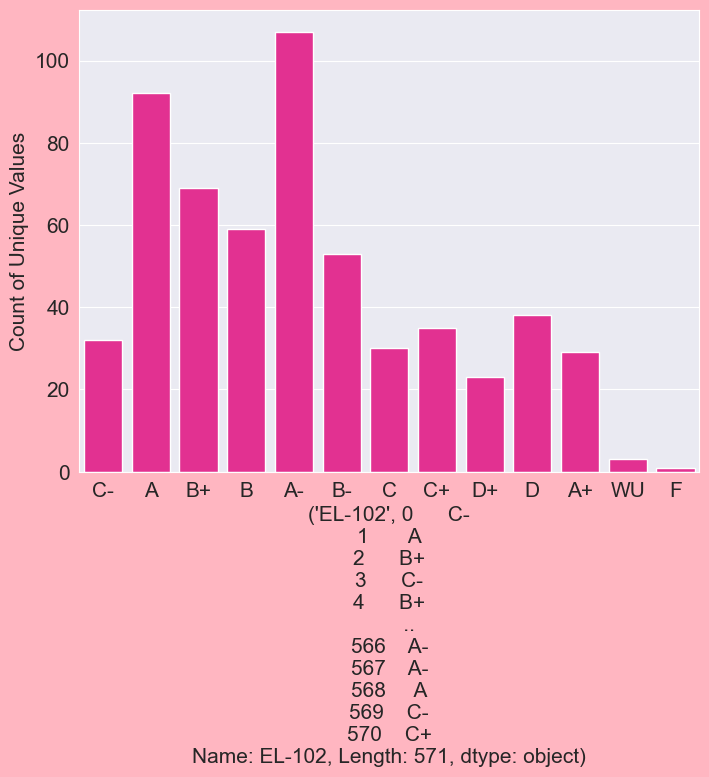

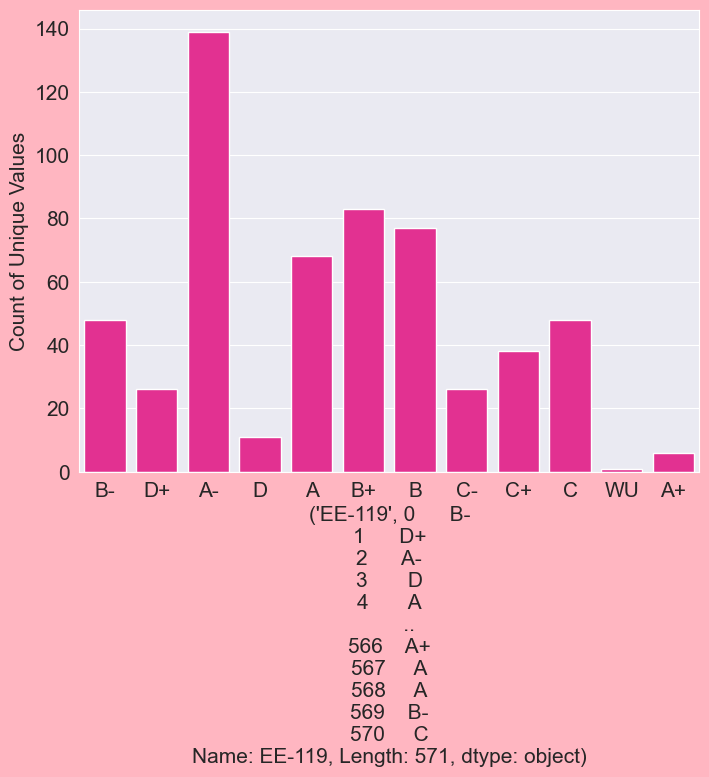

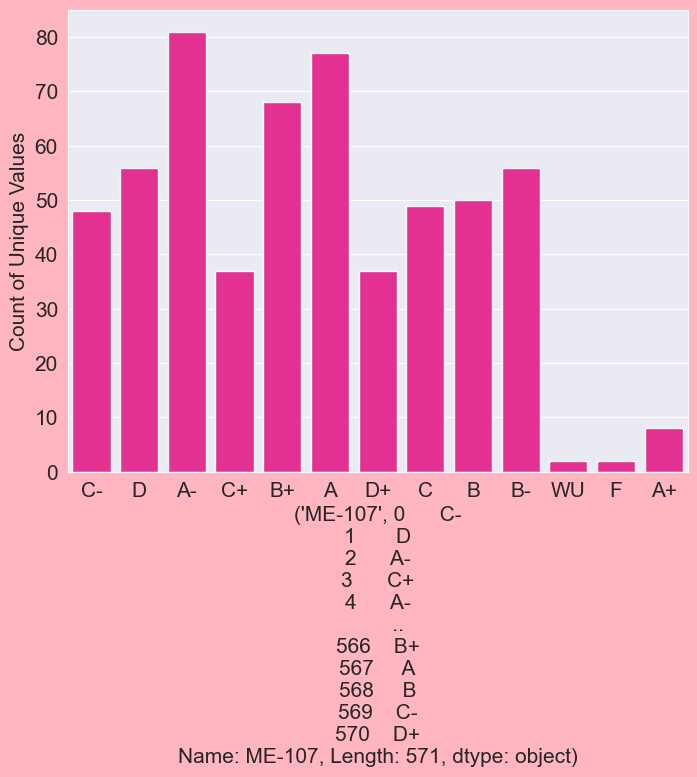

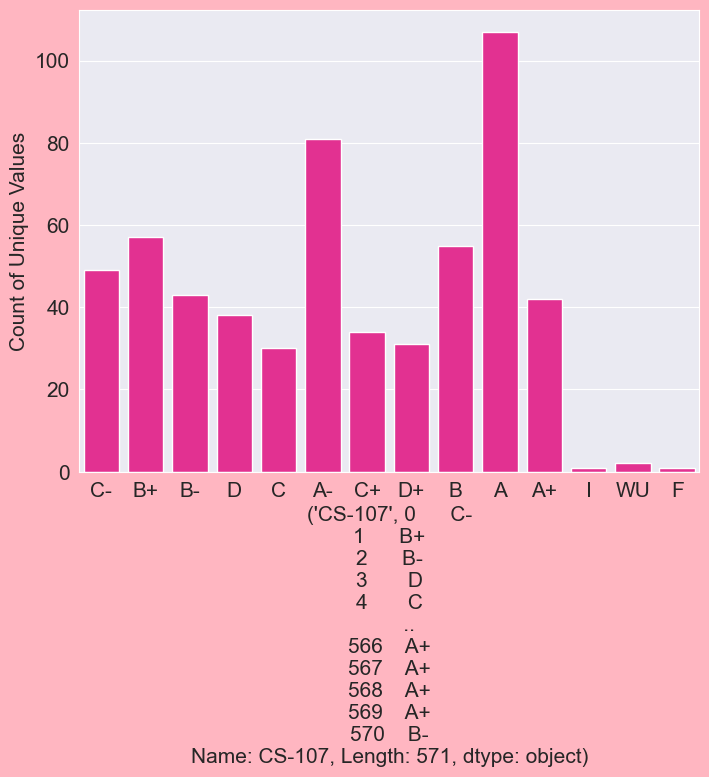

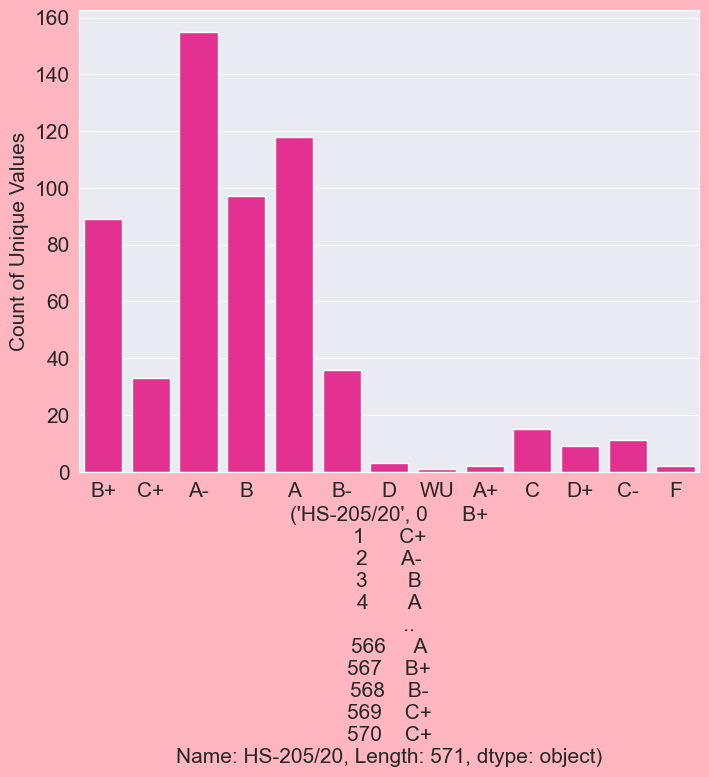

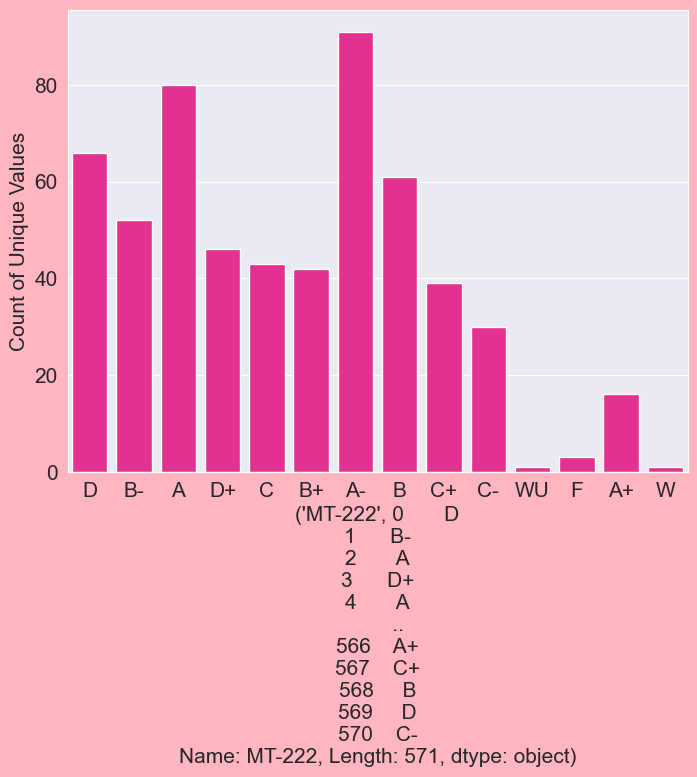

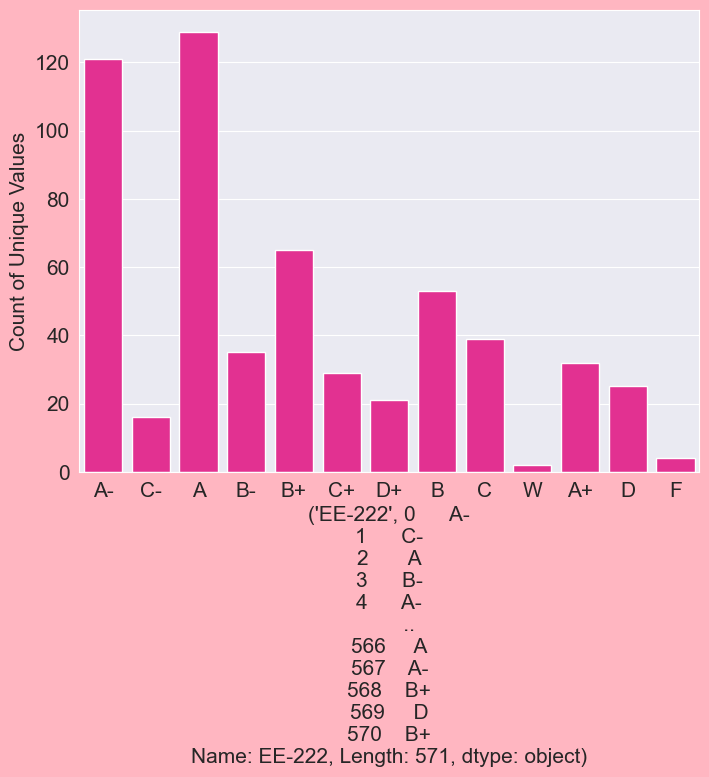

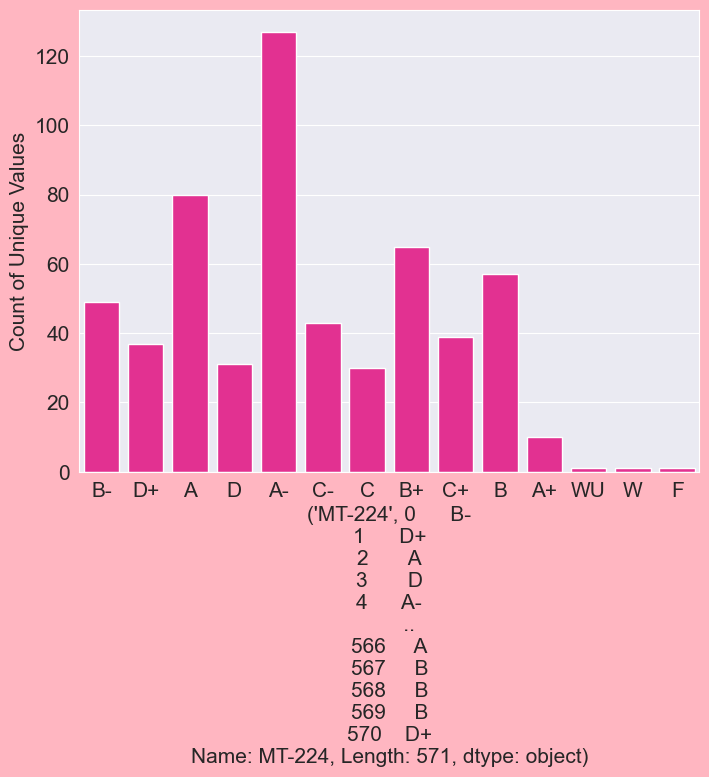

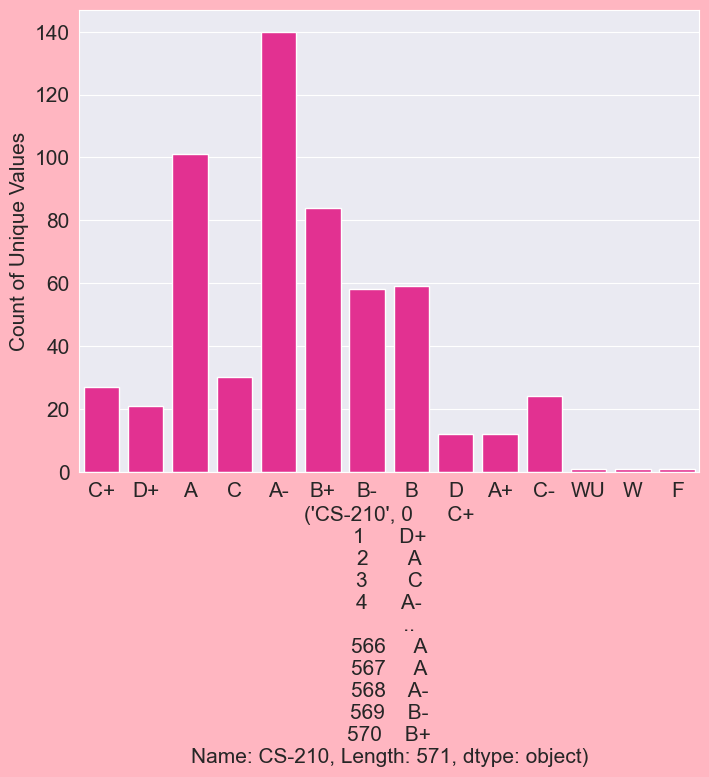

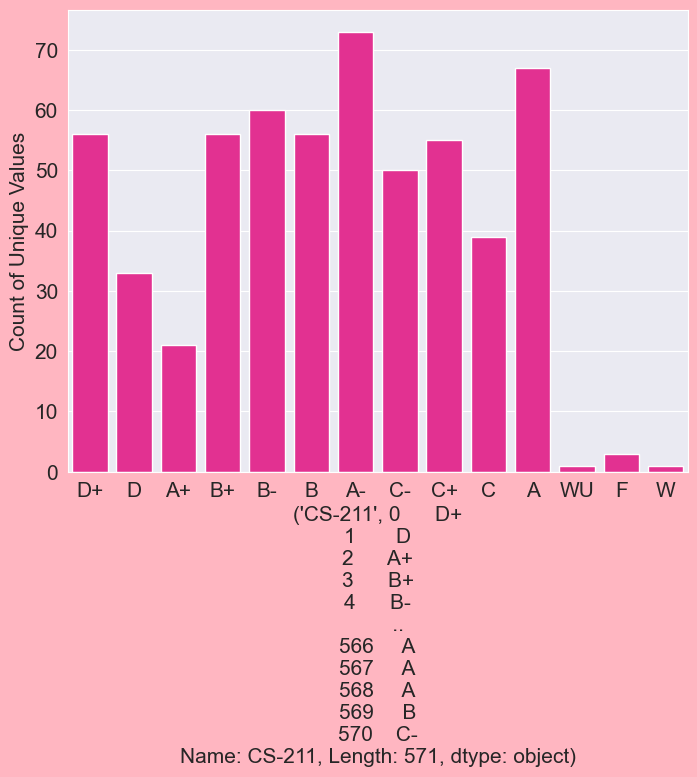

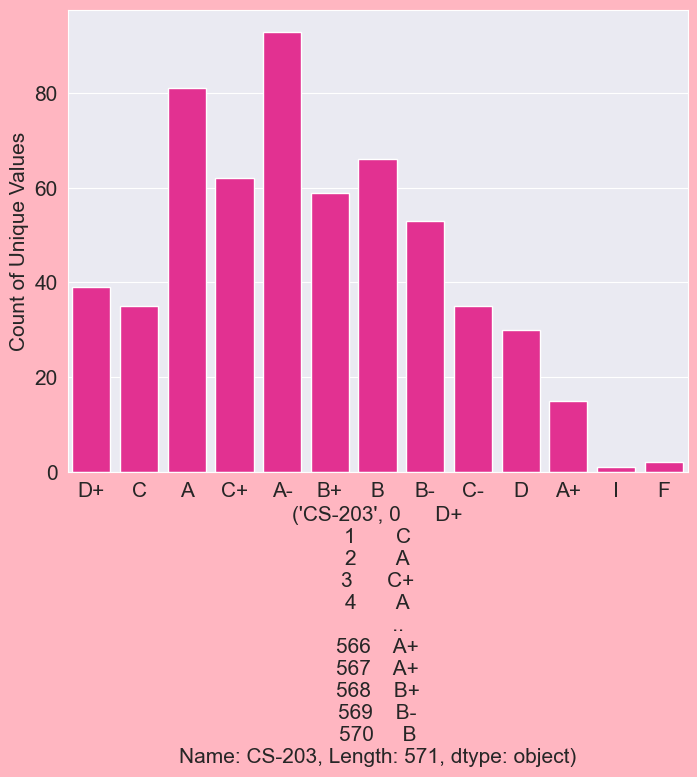

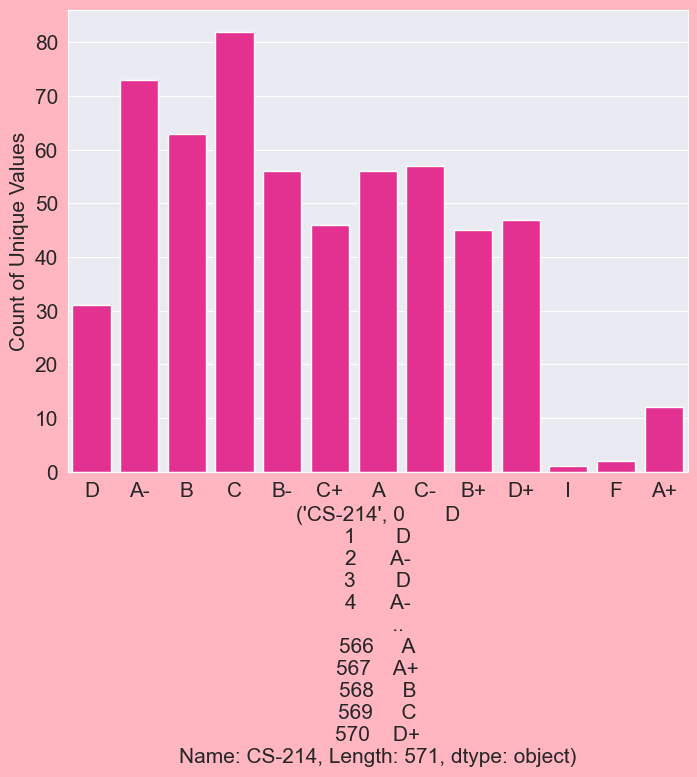

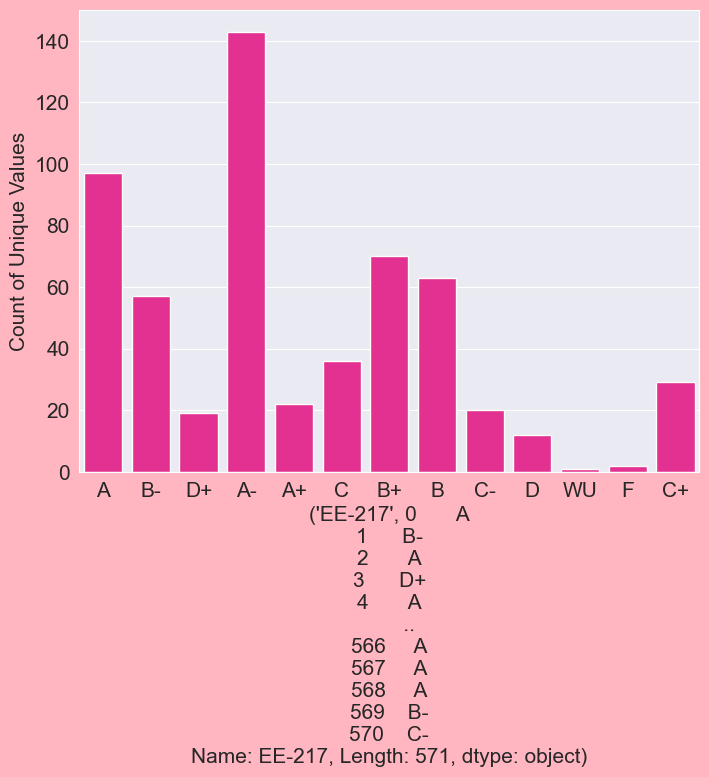

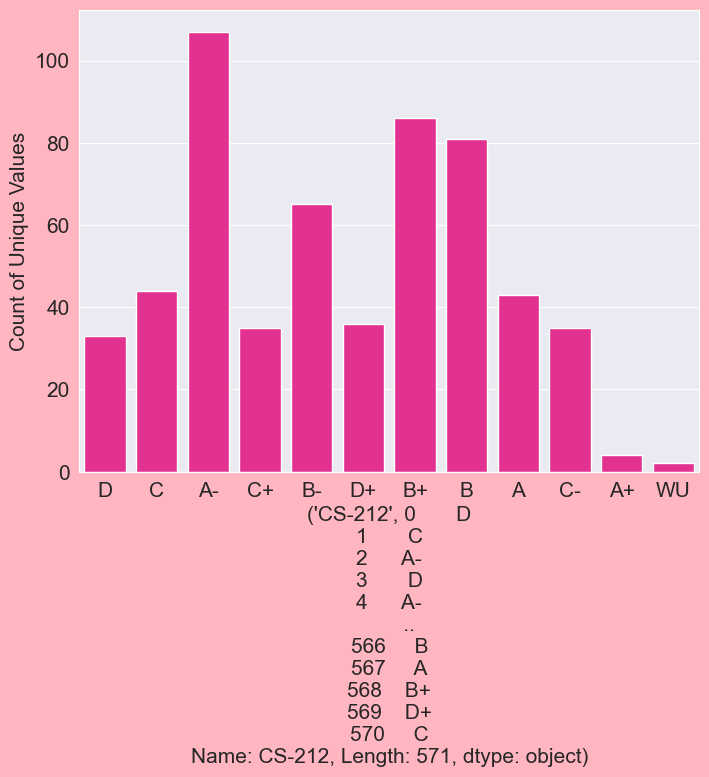

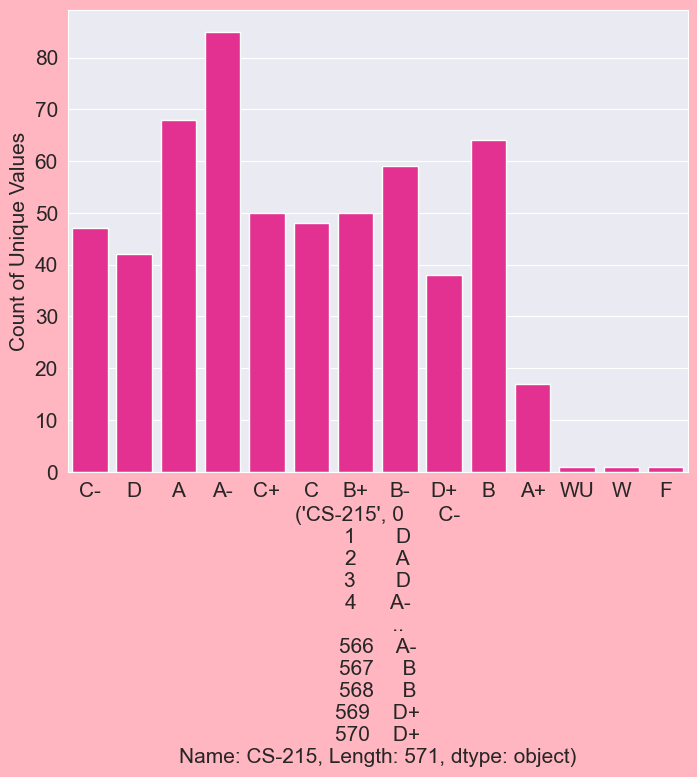

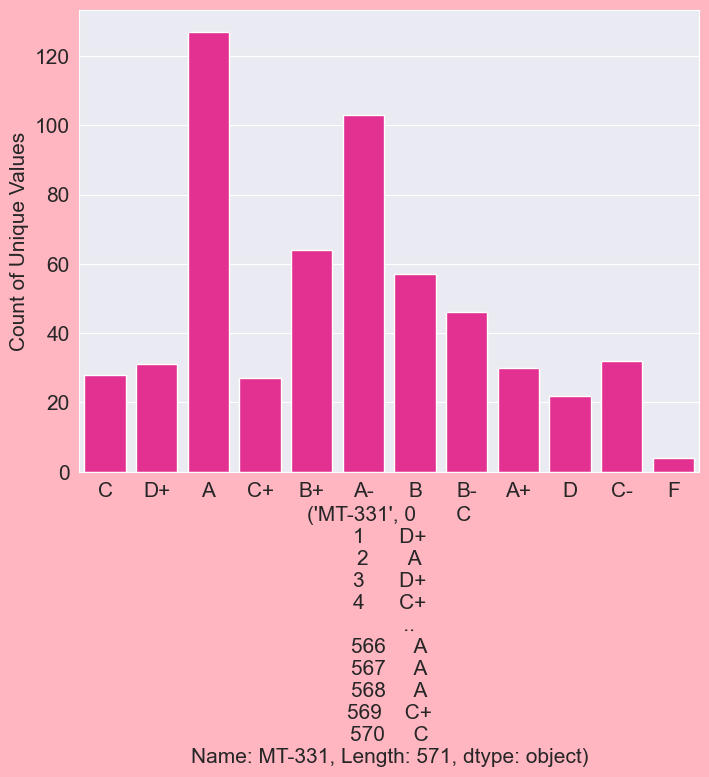

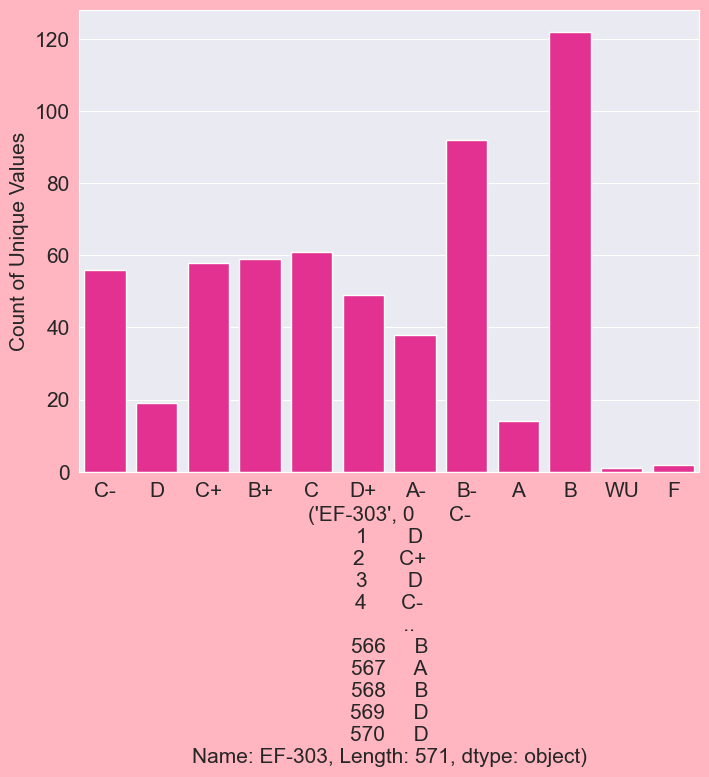

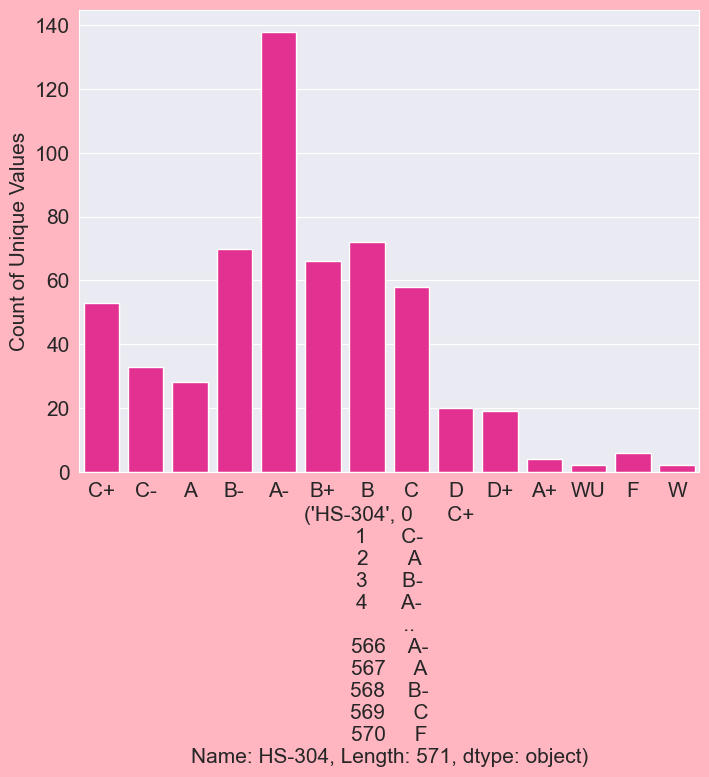

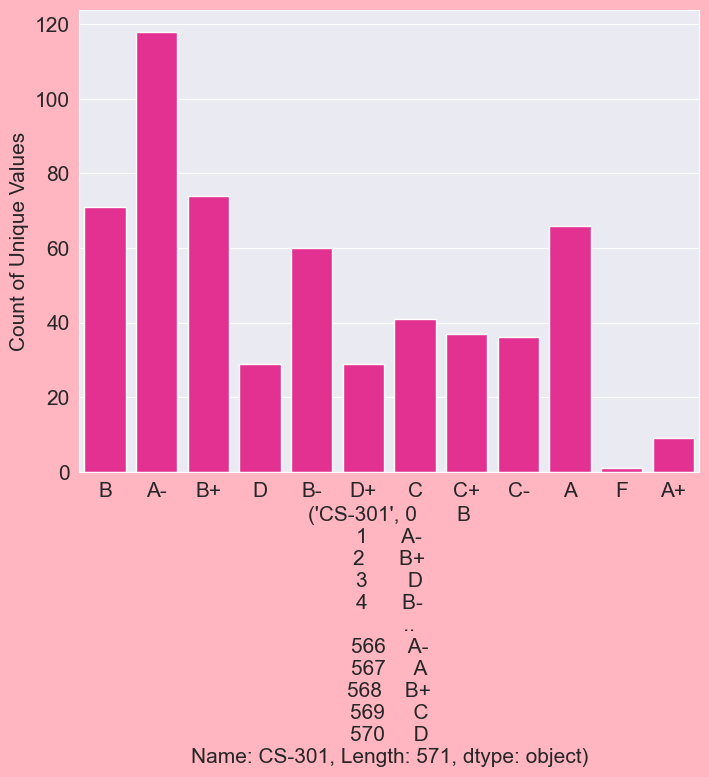

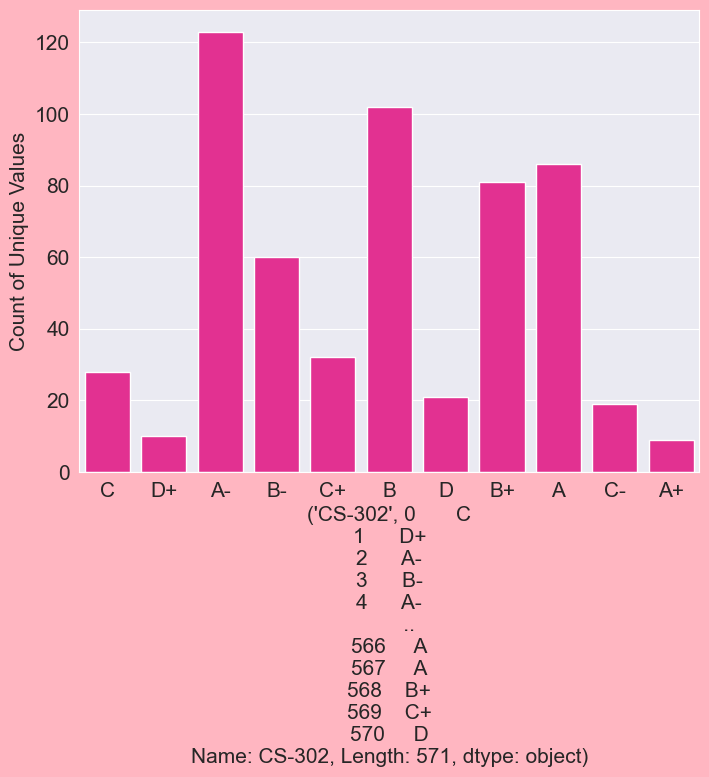

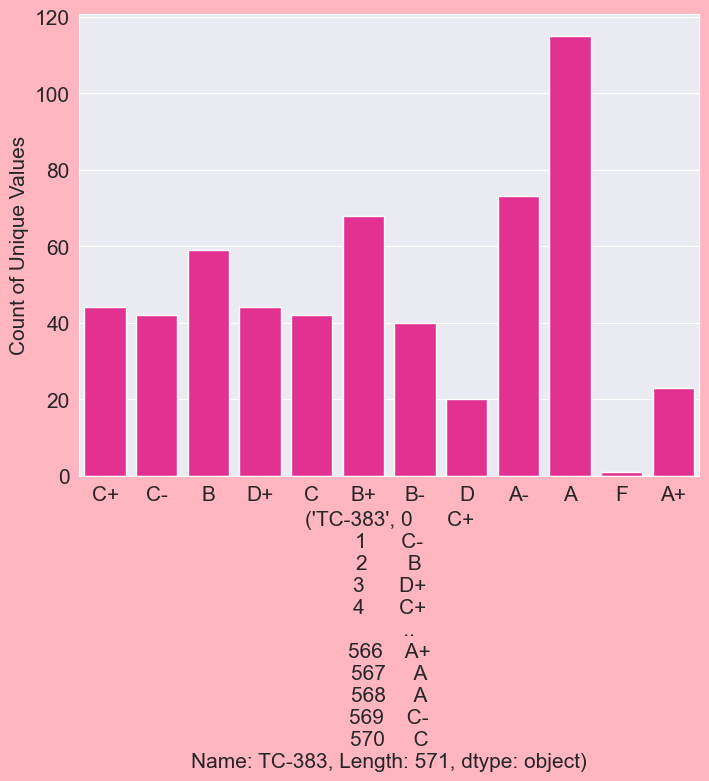

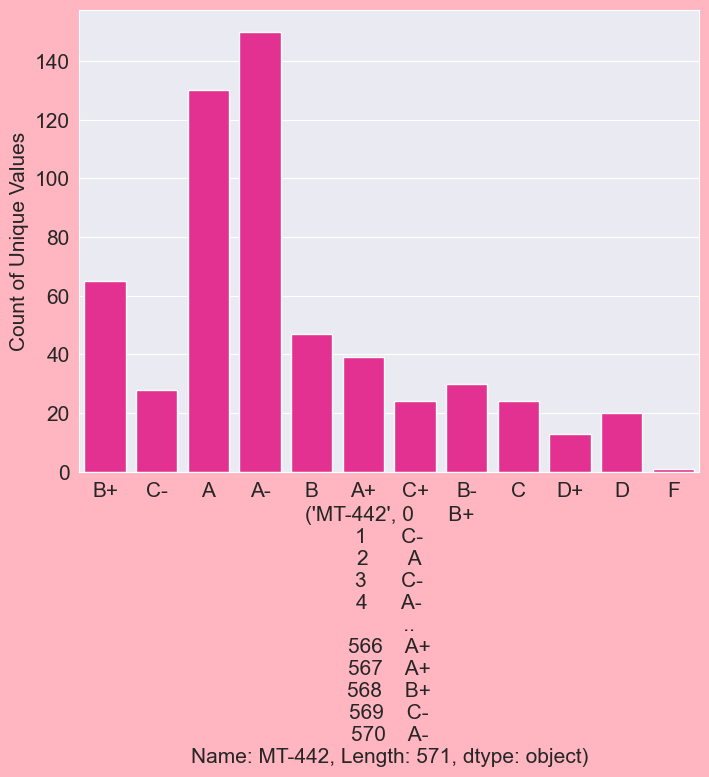

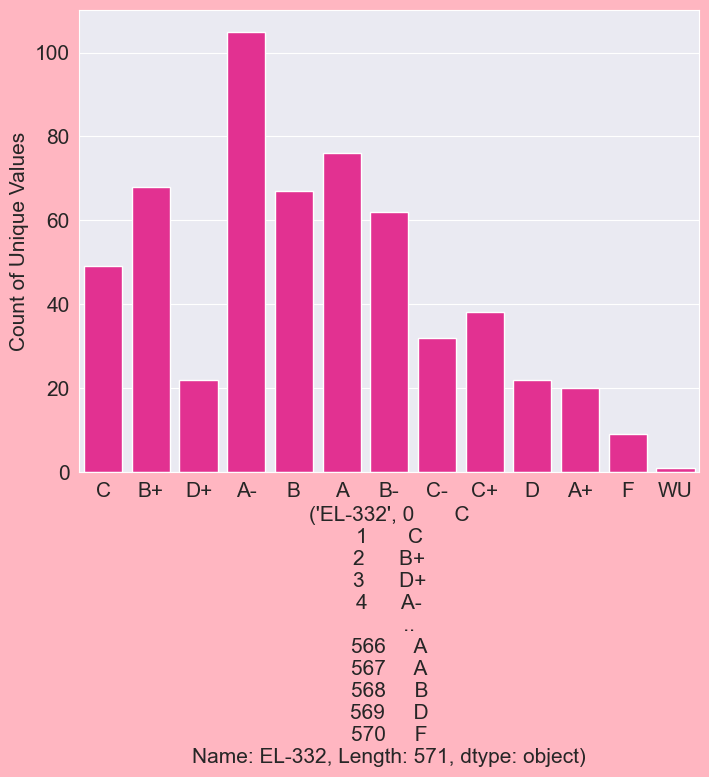

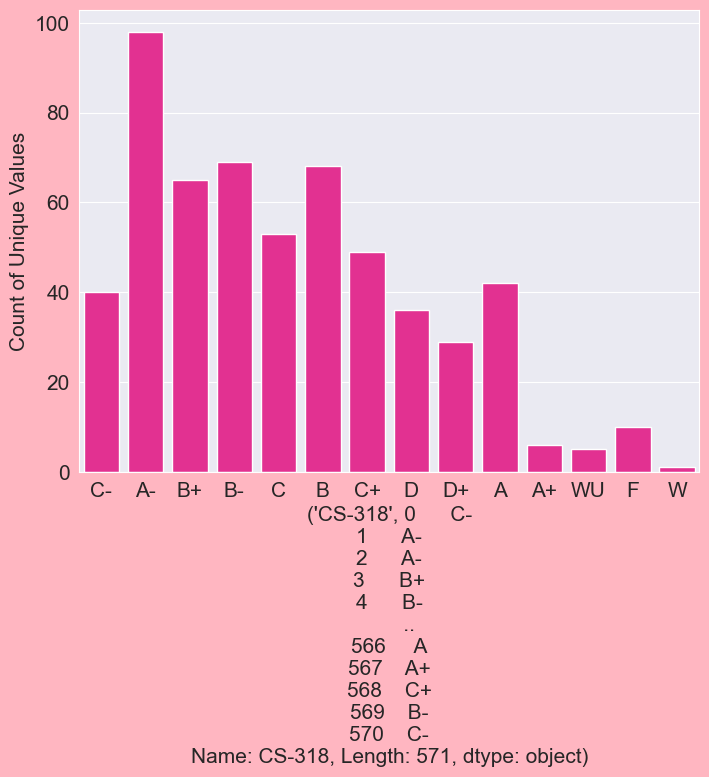

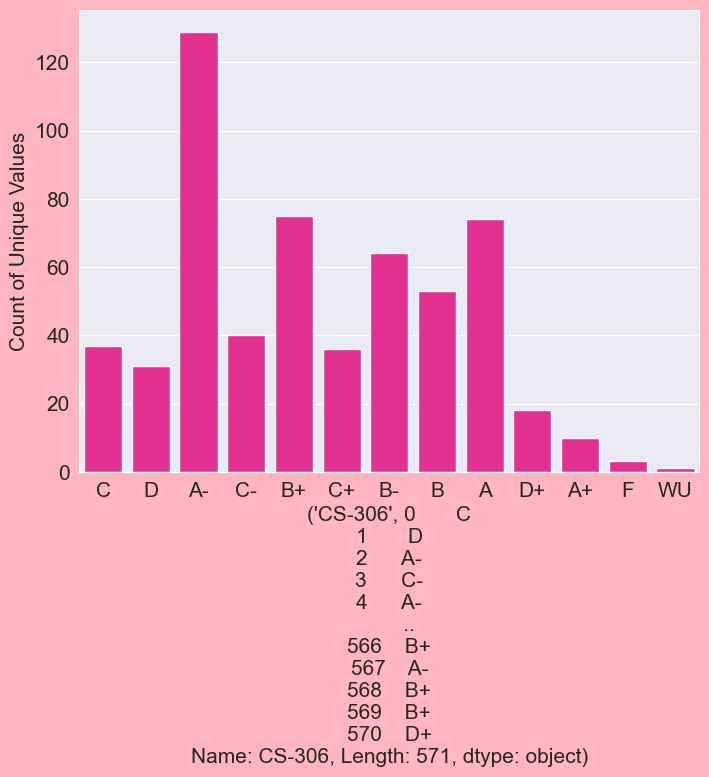

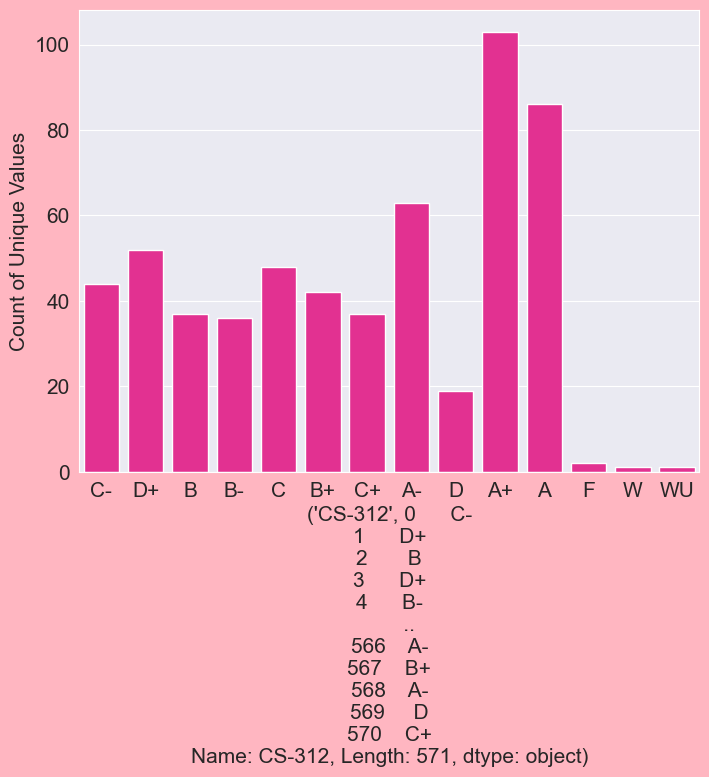

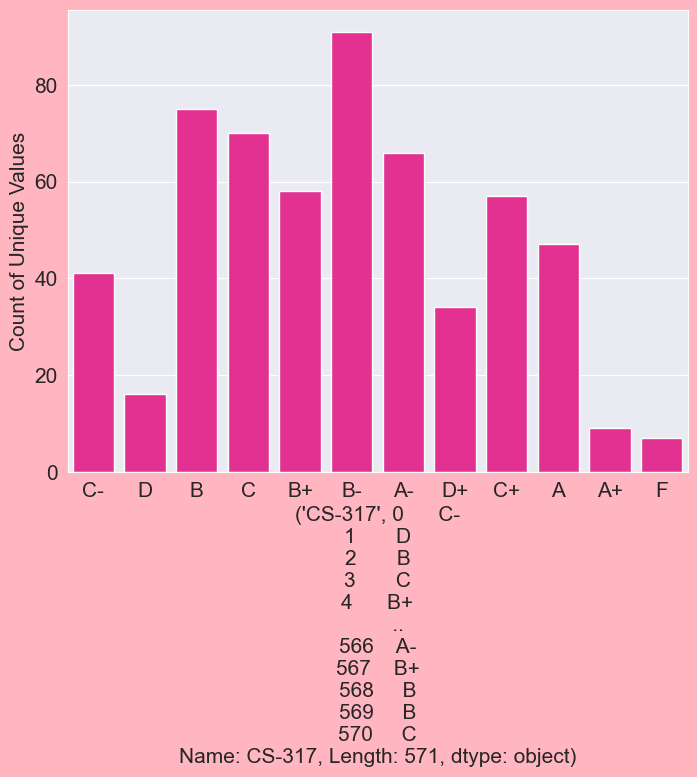

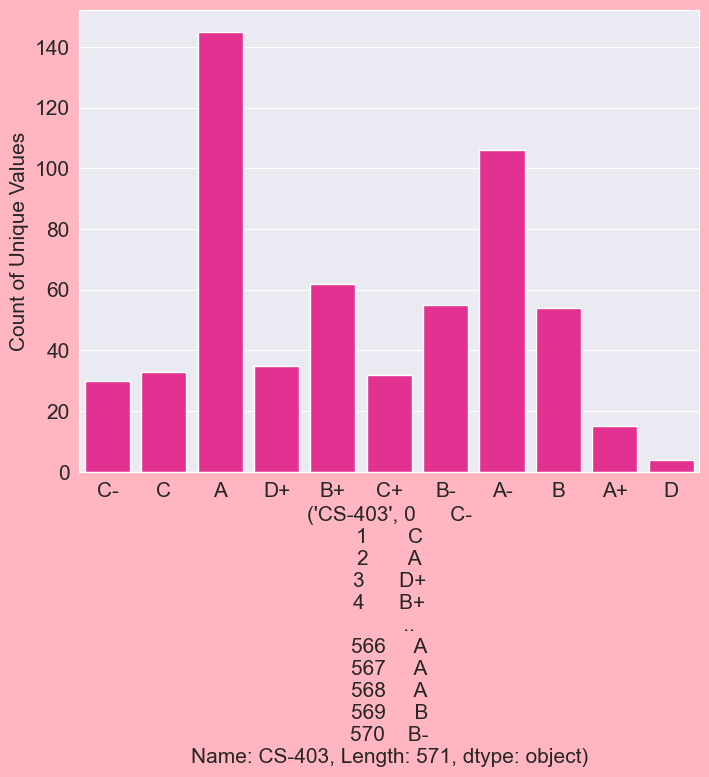

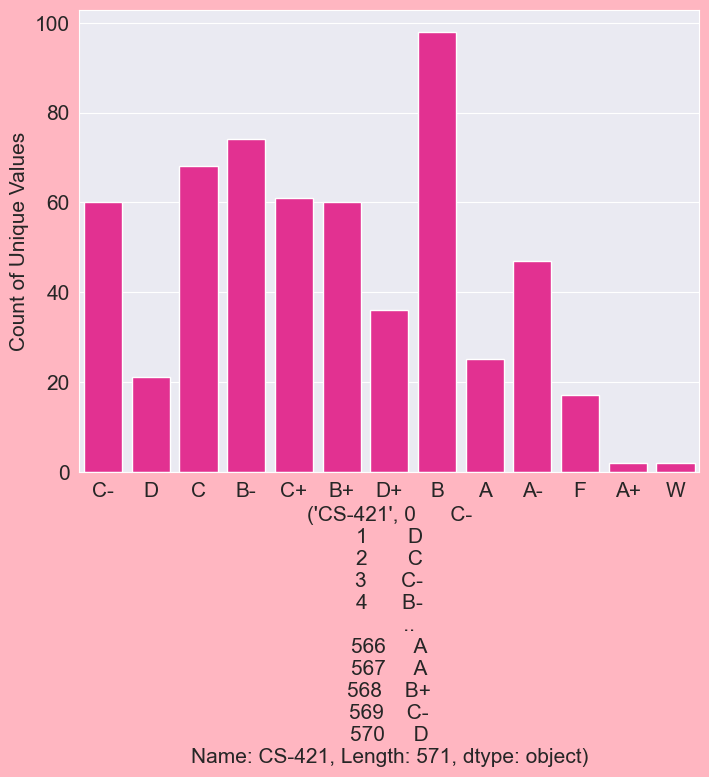

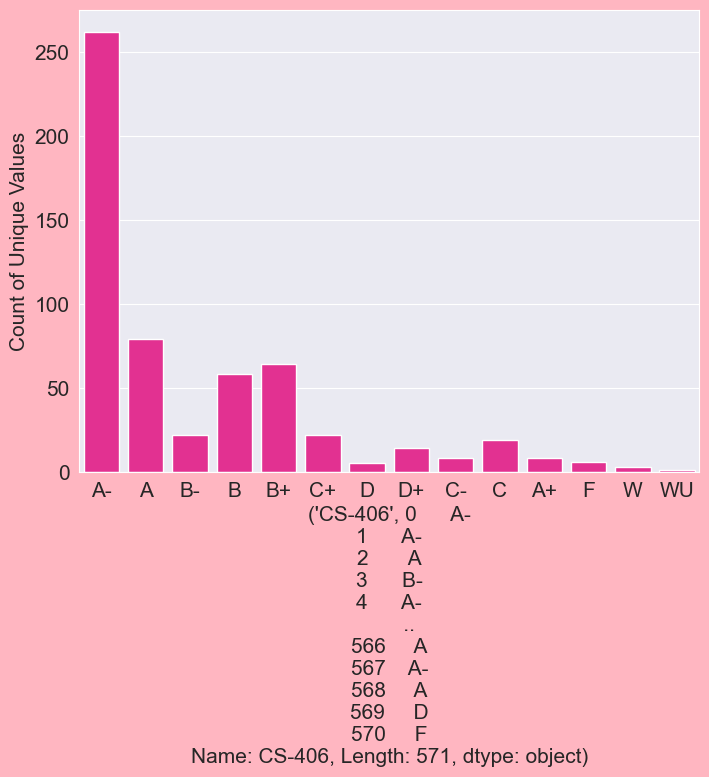

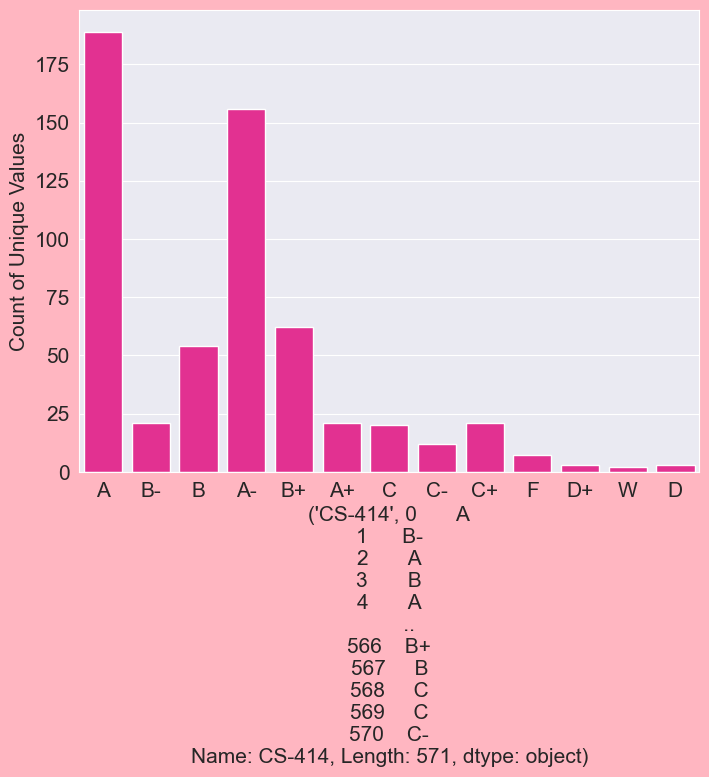

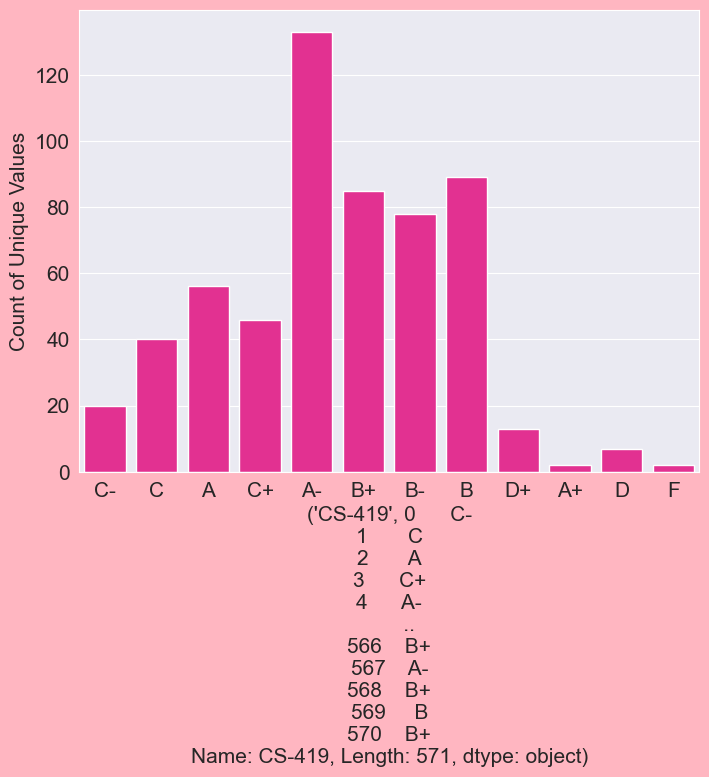

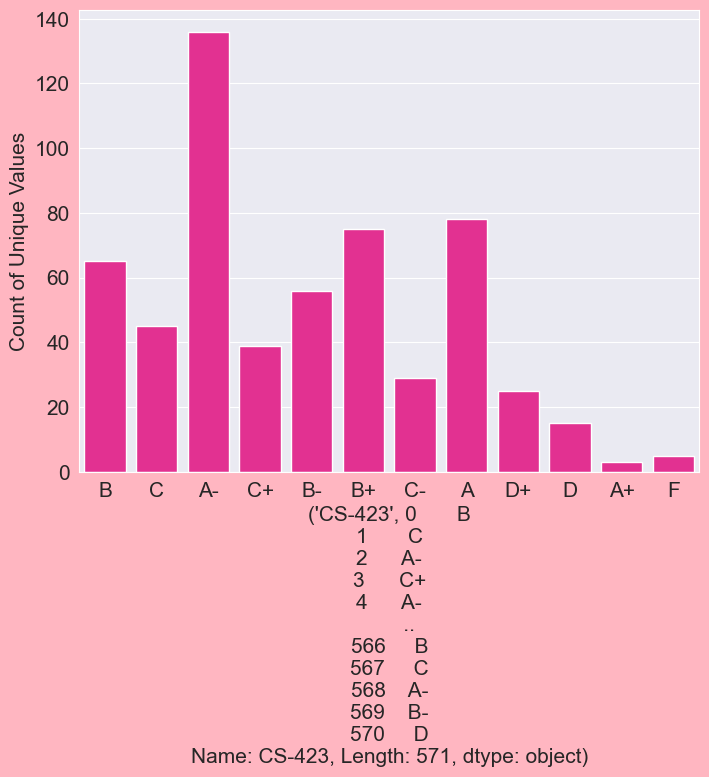

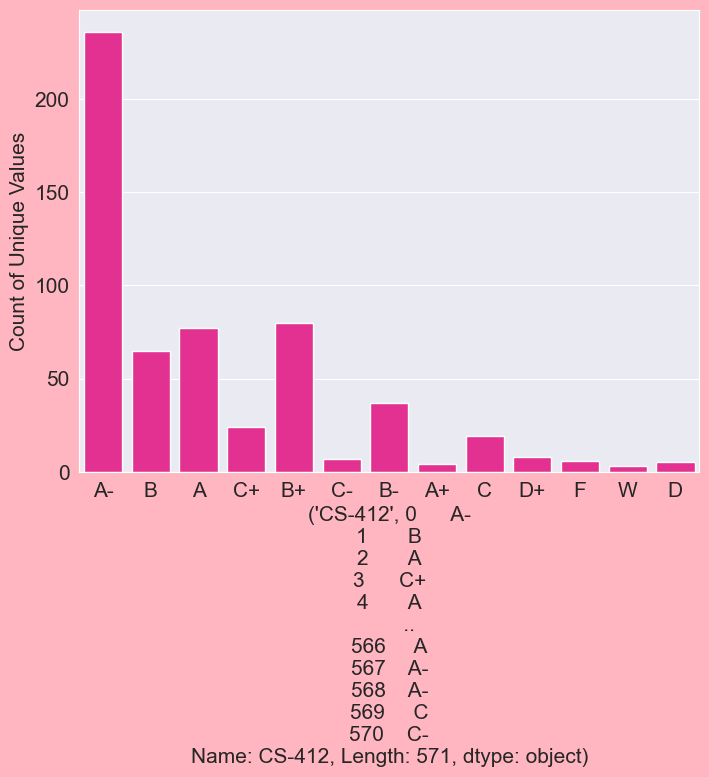

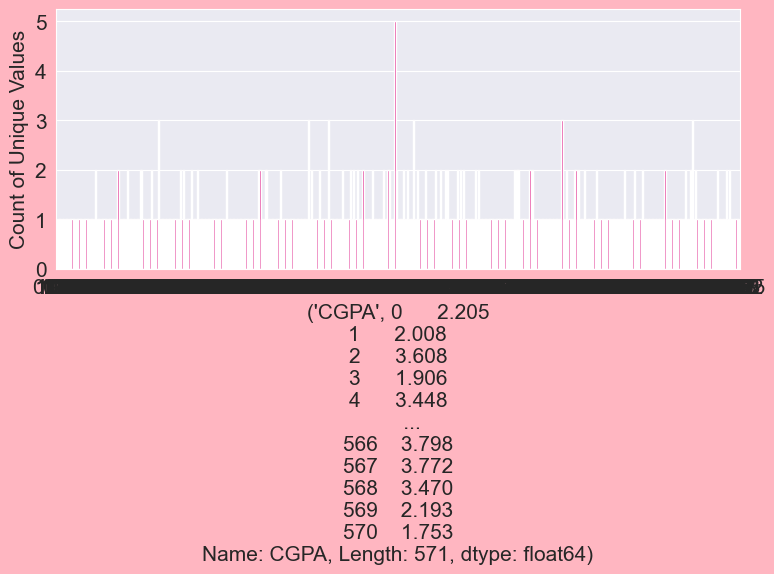

In [36]:
#Let's Plot Countplot for each column in the DataFrame
index=0
for col in grades.items():
    plt.figure(figsize=(8,6))
    sns.countplot(x=col[index], data=grades, color="deeppink")
    plt.xlabel(col)
    plt.ylabel('Count of Unique Values')
plt.tight_layout()
plt.show()

The above count plot is giving the information in terms of bar for each type of Grade in each individual subject. 

we can observe very learly that under each subject, which Grade point is high and which grade point is low.
If we take an example of the Subject "CS-301", we have 'A-' grade with highest number of students acheiving it. 
lowest is 'F' grade.

in the similar way we can estimate the highest and lowest grade points or else more number of students having which grade and less number of students having which grade per each subject.

### BAR plots for identifying the increasing and decreasing patterns

<Axes: title={'center': 'Reltaion Between CY-105 and CGPA'}, xlabel='CY-105', ylabel='CGPA'>

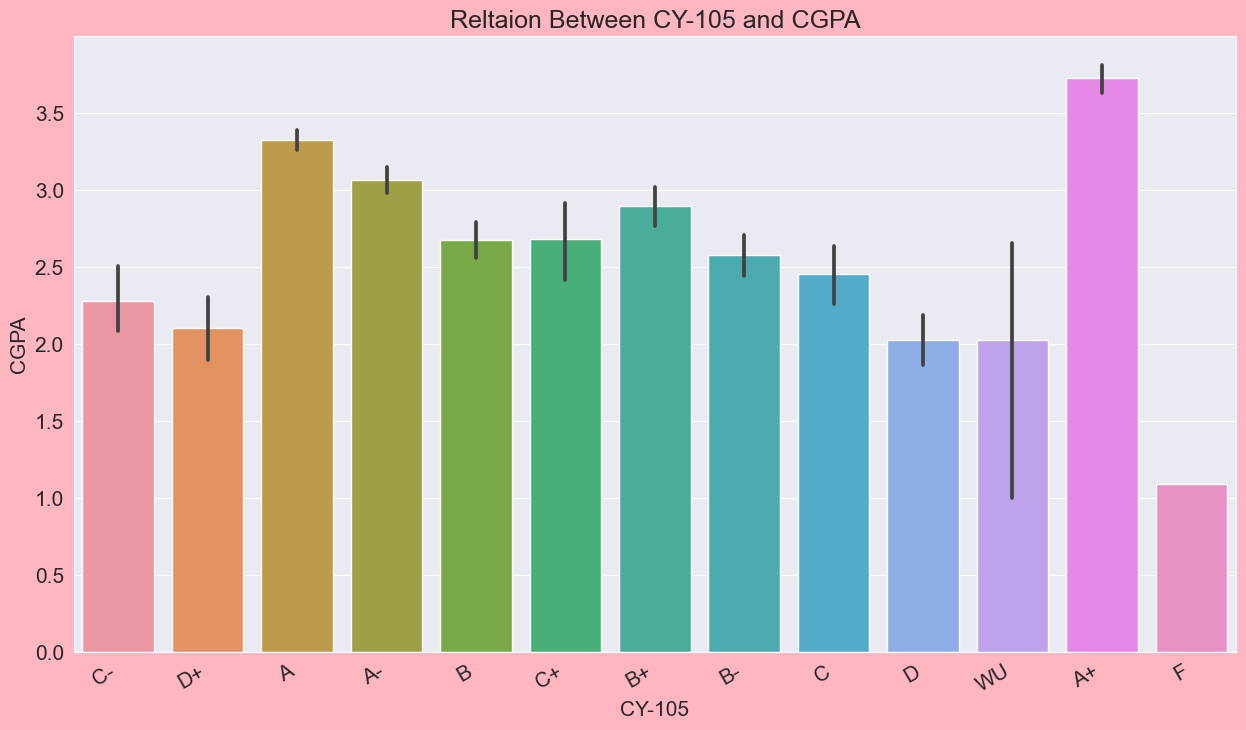

In [37]:
plt.rcParams['figure.figsize']=(15,8)
plt.title('Reltaion Between CY-105 and CGPA')
plt.xlabel('Subject CY-105', fontsize='15')
plt.ylabel('CGPA', fontsize='15')
plt.xticks(rotation =30, ha='right')
sns.barplot(x=grades['CY-105'],y=grades['CGPA'], data=grades)

 

<Axes: xlabel='EF-303', ylabel='CGPA'>

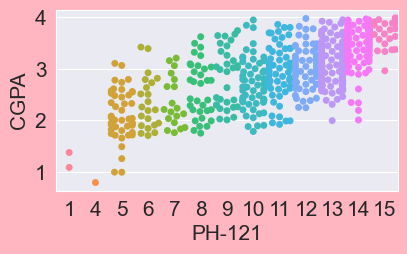

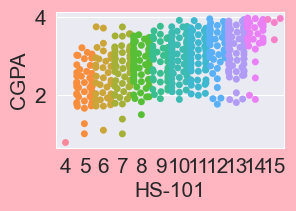

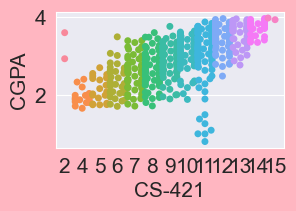

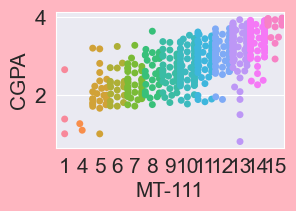

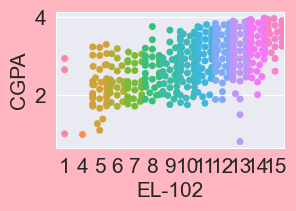

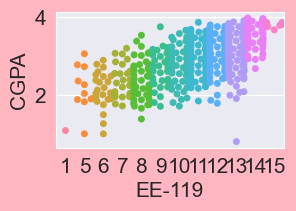

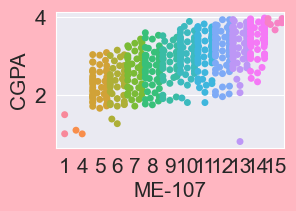

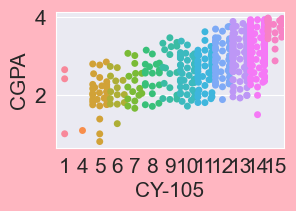

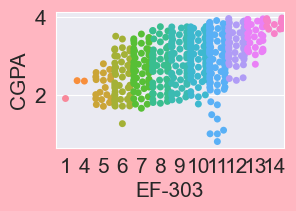

In [38]:
plt.figure(figsize=(15,8))
plt.subplot(3,3,1)
sns.swarmplot(x=GRADES['PH-121'],y=GRADES['CGPA'],data=GRADES)
plt.figure(figsize=(10,6))
plt.subplot(3,3,2)
sns.swarmplot(x=GRADES['HS-101'],y=GRADES['CGPA'],data=GRADES)
plt.figure(figsize=(10,6))
plt.subplot(3,3,3)
sns.swarmplot(x=GRADES['CS-421'],y=GRADES['CGPA'],data=GRADES)
plt.figure(figsize=(10,6))
plt.subplot(3,3,4)
sns.swarmplot(x=GRADES['MT-111'],y=GRADES['CGPA'],data=GRADES)
plt.figure(figsize=(10,6))
plt.subplot(3,3,5)
sns.swarmplot(x=GRADES['EL-102'],y=GRADES['CGPA'],data=GRADES)
plt.figure(figsize=(10,6))
plt.subplot(3,3,6)
sns.swarmplot(x=GRADES['EE-119'],y=GRADES['CGPA'],data=GRADES)
plt.figure(figsize=(10,6))
plt.subplot(3,3,7)
sns.swarmplot(x=GRADES['ME-107'],y=GRADES['CGPA'],data=GRADES)
plt.figure(figsize=(10,6))
plt.subplot(3,3,8)
sns.swarmplot(x=GRADES['CY-105'],y=GRADES['CGPA'],data=GRADES)
plt.figure(figsize=(10,6))
plt.subplot(3,3,8)
sns.swarmplot(x=GRADES['EF-303'],y=GRADES['CGPA'],data=GRADES)

As we can see as the score in PH-121 increases the CGPA also increases.
Here we can see that even when the score in CS-421 is high but the CGPA is low. Which means that the student has scored less in other subjects.


### Checking OUTLIERS Using BOX Plot

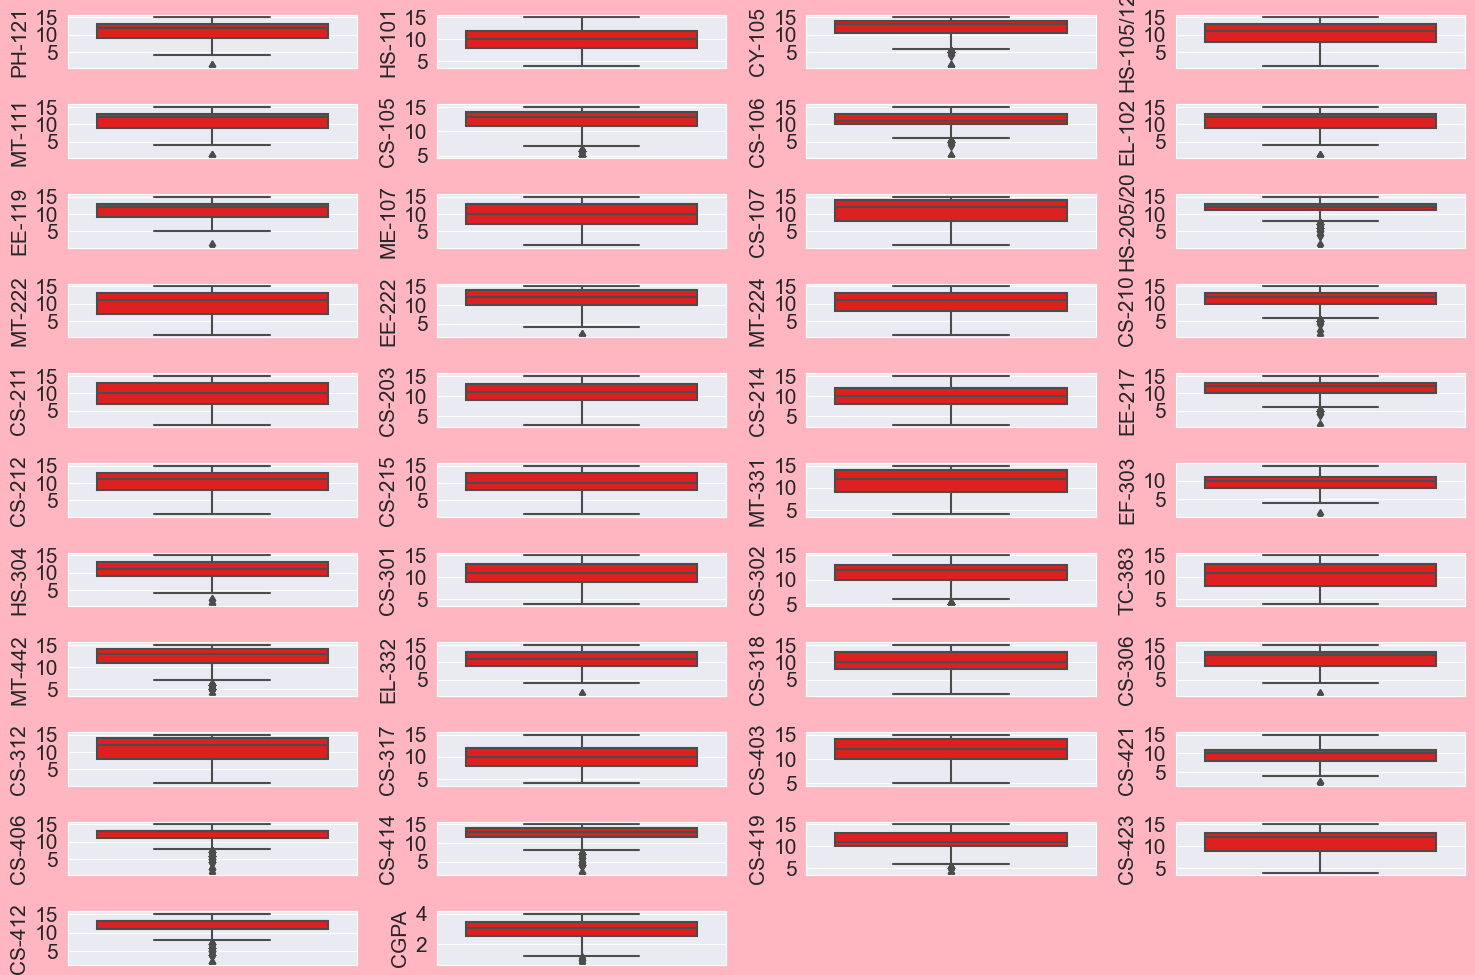

In [39]:
count = 1
plt.figure(figsize=(15,10))
for i, value in GRADES.items():
    if count<=43:
        ax=plt.subplot(11, 4, count)
        sns.boxplot(y=i, data=GRADES, color="r")
    count += 1
plt.tight_layout()
plt.show()

We can see that, Outliers are present only in very less Subject COlumns.
Now lets go for Numerical Analysis using Describe method

In [40]:
#Let's implement describe to return the description of the data in the DataFrame
grades.describe()

CGPA
count  571.000000
mean     2.954888
std      0.620552
min      0.800000
25%      2.538000
50%      3.029000
75%      3.451000
max      3.985000

In [41]:
#Let's implement describe to return the description of the data in the DataFrame
GRADES.describe()

PH-121      HS-101      CY-105   HS-105/12      MT-111      CS-105  \
count  571.000000  571.000000  571.000000  571.000000  571.000000  571.000000   
mean    11.021016    9.809107   11.802102   10.640981   10.966725   11.994746   
std      2.968770    2.724223    2.844705    3.126963    2.875293    2.500872   
min      1.000000    4.000000    1.000000    1.000000    1.000000    5.000000   
25%      9.000000    8.000000   10.500000    8.000000    9.000000   11.000000   
50%     12.000000   10.000000   13.000000   11.000000   12.000000   13.000000   
75%     13.000000   12.000000   14.000000   13.000000   13.000000   14.000000   
max     15.000000   15.000000   15.000000   15.000000   15.000000   15.000000   

           CS-106      EL-102      EE-119      ME-107  ...      CS-312  \
count  571.000000  571.000000  571.000000  571.000000  ...  571.000000   
mean    10.837128   10.919440   11.019264   10.070053  ...   11.001751   
std      2.573772    2.977192    2.492370    3.069716  ...    3.324286   
min      1.000000    1.000000    1.000000    1.000000  ...    1.000000   
25%     10.000000    9.000000    9.000000    7.000000  ...    8.000000   
50%     11.000000   12.000000   12.000000   10.000000  ...   12.000000   
75%     13.000000   13.000000   13.000000   13.000000  ...   14.000000   
max     15.000000   15.000000   15.000000   15.000000  ...   15.000000   

           CS-317      CS-403      CS-421      CS-406     CS-414      CS-419  \
count  571.000000  571.000000  571.000000  571.000000  571.00000  571.000000   
mean    10.077058   11.406305    9.518389   11.915937   12.32049   11.063047   
std      2.574030    2.621014    2.579459    2.312424    2.25262    2.203558   
min      4.000000    5.000000    2.000000    1.000000    2.00000    4.000000   
25%      8.000000   10.000000    8.000000   11.000000   11.50000   10.000000   
50%     10.000000   12.000000   10.000000   13.000000   13.00000   11.000000   
75%     12.000000   14.000000   11.000000   13.000000   14.00000   13.000000   
max     15.000000   15.000000   15.000000   15.000000   15.00000   15.000000   

           CS-423      CS-412        CGPA  
count  571.000000  571.000000  571.000000  
mean    10.926445   11.858144    2.954888  
std      2.601252    2.173811    0.620552  
min      4.000000    2.000000    0.800000  
25%      9.000000   11.000000    2.538000  
50%     12.000000   13.000000    3.029000  
75%     13.000000   13.000000    3.451000  
max     15.000000   15.000000    3.985000  

[8 rows x 42 columns]

Since, the describe() method is used to return the description of the data in the given Dataset, we use it to find out the description of Numerical data which gives the final conclusion and information as follows in the each column

1) COUNT: The Counts of all coulmns are same, which shows no data is missed.

2) MEAN: If the Mean Value is greater than the Median(50%), it results in right skewness

3) If mean is lesser than median results in Left Skewness

4) The large variation in mean and 75% results in a possibility of outliers, which we will handled later.

5) We can also observe that the standard deviation is corrected sample standard deviation, 25% percentile are calculated in the describe method

Observation: As we can see from the table above, the median and mean values are nearly identical. Additionally, since there is little variation between the 75% and max, the outliers won't be eliminated. Our goal is a cumulative grade point average (CGPA), which is the student's overall grade point average.

In [42]:
#Let's Check SKEW in both Target and Features seperately
grades.skew()

CGPA   -0.497203
dtype: float64

In [43]:
GRADES.skew()

PH-121      -0.804915
HS-101      -0.172287
CY-105      -1.307629
HS-105/12   -0.494145
MT-111      -0.741118
CS-105      -1.117788
CS-106      -0.938399
EL-102      -0.742590
EE-119      -0.765022
ME-107      -0.328843
CS-107      -0.543148
HS-205/20   -1.355850
MT-222      -0.319727
EE-222      -0.959469
MT-224      -0.619894
CS-210      -1.008810
CS-211      -0.217277
CS-203      -0.423782
CS-214      -0.023535
EE-217      -0.927168
CS-212      -0.617199
CS-215      -0.292824
MT-331      -0.764554
EF-303      -0.313170
HS-304      -0.701306
CS-301      -0.579013
CS-302      -0.905432
TC-383      -0.431064
MT-442      -1.100499
EL-332      -0.610955
CS-318      -0.547352
CS-306      -0.692264
CS-312      -0.385123
CS-317      -0.189047
CS-403      -0.722310
CS-421      -0.267693
CS-406      -1.894639
CS-414      -1.755045
CS-419      -0.718000
CS-423      -0.720838
CS-412      -1.800803
CGPA        -0.497203
dtype: float64

We can observe the numerical values of Skewness in the above method which we have already identified in the KDE Plot earlier.

In [44]:
#Let's Find Multicollinearity Using Correlation
cor=GRADES.corr()
cor

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105  \
PH-121     1.000000  0.408313  0.625570   0.550759  0.499304  0.674405   
HS-101     0.408313  1.000000  0.359821   0.489513  0.461921  0.444827   
CY-105     0.625570  0.359821  1.000000   0.589200  0.583034  0.615125   
HS-105/12  0.550759  0.489513  0.589200   1.000000  0.532930  0.540423   
MT-111     0.499304  0.461921  0.583034   0.532930  1.000000  0.436697   
CS-105     0.674405  0.444827  0.615125   0.540423  0.436697  1.000000   
CS-106     0.304673  0.362372  0.415639   0.533986  0.551635  0.303772   
EL-102     0.428735  0.374912  0.490713   0.380760  0.580294  0.363988   
EE-119     0.656008  0.318875  0.534521   0.454481  0.447359  0.591933   
ME-107     0.568317  0.361391  0.468693   0.377485  0.490425  0.495721   
CS-107     0.516314  0.513380  0.524493   0.577837  0.520191  0.539874   
HS-205/20  0.323649  0.196348  0.310359   0.212637  0.345823  0.205460   
MT-222     0.560159  0.413010  0.500185   0.493010  0.516611  0.505324   
EE-222     0.555739  0.410122  0.431319   0.403535  0.397128  0.516002   
MT-224     0.358249  0.265661  0.419032   0.413770  0.585225  0.273888   
CS-210     0.532376  0.357983  0.496997   0.504631  0.623636  0.462445   
CS-211     0.351411  0.348773  0.476683   0.394239  0.557618  0.379726   
CS-203     0.483335  0.275838  0.414012   0.333755  0.527265  0.441311   
CS-214     0.452993  0.491749  0.526042   0.456675  0.599617  0.480002   
EE-217     0.447713  0.366384  0.433961   0.398061  0.548892  0.376561   
CS-212     0.391938  0.371215  0.448213   0.509602  0.596141  0.368087   
CS-215     0.526886  0.439744  0.546494   0.507320  0.582980  0.498314   
MT-331     0.197671  0.169098  0.355195   0.288165  0.420218  0.246517   
EF-303     0.232440  0.259734  0.354146   0.433271  0.455174  0.233481   
HS-304     0.469821  0.455029  0.364188   0.365548  0.326846  0.504812   
CS-301     0.317078  0.320672  0.371123   0.464278  0.561947  0.266828   
CS-302     0.461128  0.382065  0.451870   0.472676  0.515737  0.466587   
TC-383     0.190877  0.355791  0.291194   0.438936  0.526692  0.225845   
MT-442     0.476378  0.272867  0.443232   0.363215  0.417212  0.457154   
EL-332     0.406663  0.415664  0.366477   0.391883  0.581826  0.373790   
CS-318     0.442816  0.462749  0.349459   0.397570  0.366670  0.465073   
CS-306     0.472395  0.461820  0.395610   0.522881  0.490731  0.436325   
CS-312     0.000530  0.237543  0.227298   0.273136  0.473004  0.041573   
CS-317     0.498896  0.418667  0.496846   0.520677  0.585372  0.417585   
CS-403     0.332138  0.254129  0.478341   0.497107  0.424087  0.290992   
CS-421     0.328704  0.348156  0.377181   0.446819  0.540234  0.285437   
CS-406     0.283666  0.321058  0.155352   0.199866  0.295895  0.250807   
CS-414     0.180791  0.273289  0.063576   0.138157  0.249492  0.157566   
CS-419     0.452214  0.292800  0.439158   0.479414  0.517853  0.342290   
CS-423     0.090163  0.249547  0.122262   0.239825  0.400776  0.059001   
CS-412     0.244854  0.259379  0.047086   0.155095  0.275439  0.168317   
CGPA       0.682578  0.560989  0.682314   0.657242  0.748476  0.644594   

             CS-106    EL-102    EE-119    ME-107  ...    CS-312    CS-317  \
PH-121     0.304673  0.428735  0.656008  0.568317  ...  0.000530  0.498896   
HS-101     0.362372  0.374912  0.318875  0.361391  ...  0.237543  0.418667   
CY-105     0.415639  0.490713  0.534521  0.468693  ...  0.227298  0.496846   
HS-105/12  0.533986  0.380760  0.454481  0.377485  ...  0.273136  0.520677   
MT-111     0.551635  0.580294  0.447359  0.490425  ...  0.473004  0.585372   
CS-105     0.303772  0.363988  0.591933  0.495721  ...  0.041573  0.417585   
CS-106     1.000000  0.364840  0.273160  0.309212  ...  0.468159  0.431162   
EL-102     0.364840  1.000000  0.434062  0.454998  ...  0.324761  0.475614   
EE-119     0.273160  0.434062  1.000000  0.609088  ...  0.149488  0.481884   
ME-107     0.309212  0.454998  0.609088  1.000000 

<Axes: >

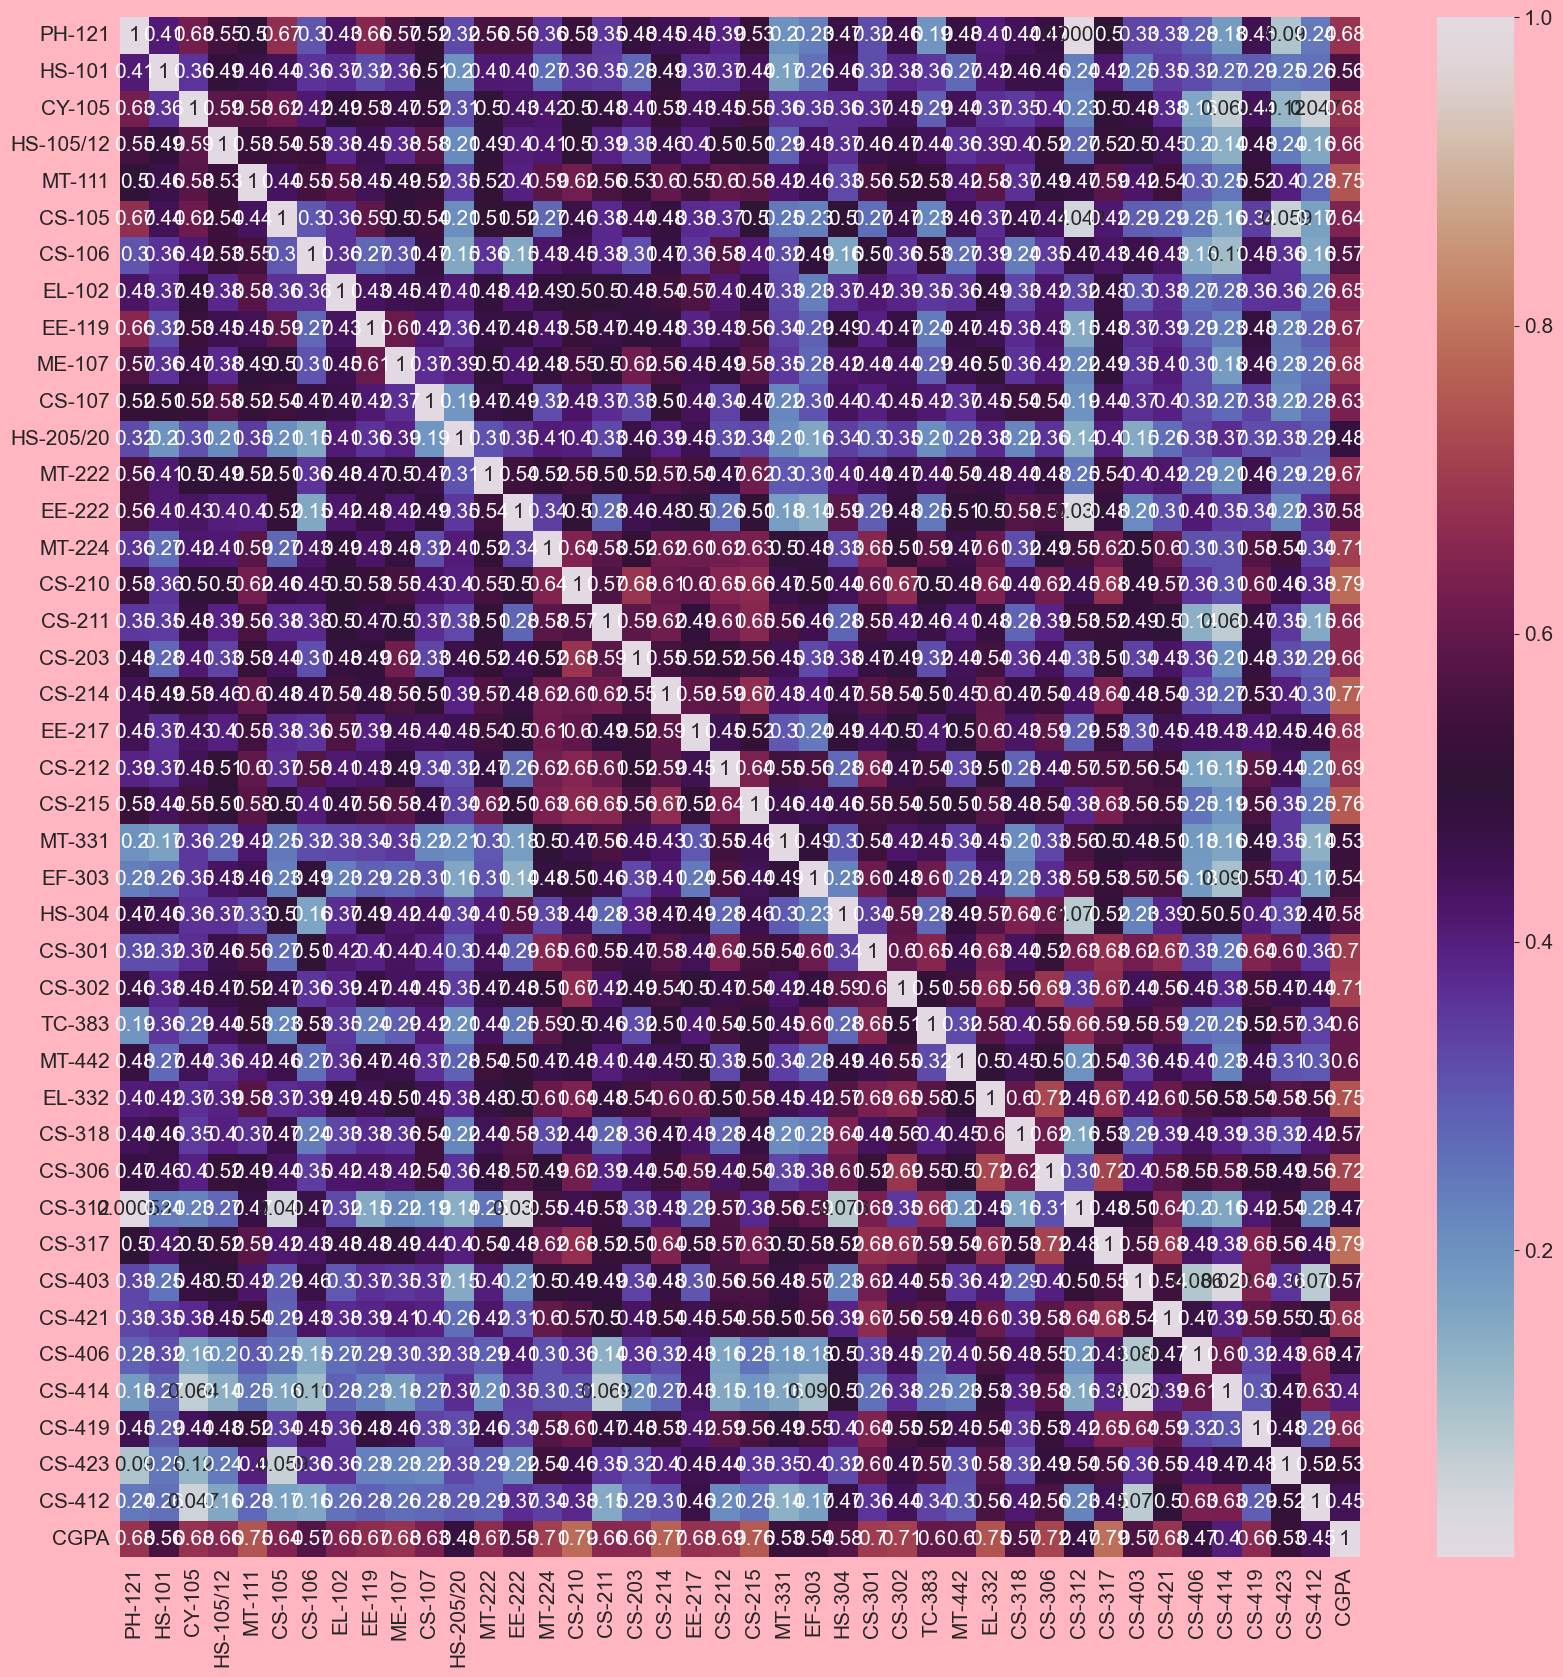

In [49]:
# Visualizing the Correlation Matrix by plotting Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(cor, linecolor= "black", annot= True, cmap="twilight")

The input variables and the target variable have a nearly same correlation. Although it is a cumulative score, the results are slightly different because of the missing data, for which I switched to a column-based mode.

## Feature Scaling using MinMax Scaler

In [50]:
#dividing up the data
x= GRADES.drop(['CGPA'], axis=1)
y= GRADES['CGPA']

In [51]:
from sklearn.preprocessing import MinMaxScaler
st=MinMaxScaler()
x=pd.DataFrame(st.fit_transform(x))
x

0         1         2         3         4    5         6   \
0    0.642857  0.181818  0.428571  0.500000  0.428571  0.1  0.285714   
1    0.928571  0.090909  0.357143  0.285714  0.642857  0.3  0.285714   
2    0.928571  0.636364  0.928571  0.642857  0.785714  0.9  0.642857   
3    0.285714  0.454545  0.357143  0.285714  0.285714  0.8  0.357143   
4    0.857143  0.818182  0.857143  0.785714  0.928571  0.9  0.857143   
..        ...       ...       ...       ...       ...  ...       ...   
566  0.714286  0.909091  0.928571  0.857143  1.000000  0.9  0.857143   
567  1.000000  0.909091  0.928571  0.928571  0.928571  0.9  0.928571   
568  0.714286  0.909091  0.857143  0.785714  0.928571  0.9  0.928571   
569  0.928571  0.727273  0.285714  0.928571  0.285714  0.1  0.642857   
570  0.500000  0.090909  0.285714  0.500000  0.500000  0.1  0.714286   

           7         8         9   ...        31        32        33   34  \
0    0.428571  0.642857  0.428571  ...  0.500000  0.428571  0.272727  0.2   
1    0.928571  0.357143  0.285714  ...  0.285714  0.357143  0.090909  0.3   
2    0.785714  0.857143  0.857143  ...  0.857143  0.714286  0.636364  0.9   
3    0.428571  0.285714  0.571429  ...  0.428571  0.357143  0.363636  0.1   
4    0.785714  0.928571  0.857143  ...  0.857143  0.642857  0.727273  0.7   
..        ...       ...       ...  ...       ...       ...       ...  ...   
566  0.857143  1.000000  0.785714  ...  0.785714  0.857143  0.818182  0.9   
567  0.857143  0.928571  0.928571  ...  0.857143  0.785714  0.727273  0.9   
568  0.928571  0.928571  0.714286  ...  0.785714  0.857143  0.636364  0.9   
569  0.428571  0.642857  0.428571  ...  0.785714  0.285714  0.636364  0.6   
570  0.571429  0.500000  0.357143  ...  0.357143  0.571429  0.363636  0.5   

           35        36        37        38        39        40  
0    0.384615  0.857143  0.923077  0.272727  0.636364  0.846154  
1    0.230769  0.857143  0.615385  0.363636  0.363636  0.692308  
2    0.461538  0.928571  0.923077  0.909091  0.818182  0.923077  
3    0.384615  0.642857  0.692308  0.454545  0.454545  0.538462  
4    0.615385  0.857143  0.923077  0.818182  0.818182  0.923077  
..        ...       ...       ...       ...       ...       ...  
566  0.923077  0.928571  0.769231  0.727273  0.636364  0.923077  
567  0.923077  0.857143  0.692308  0.818182  0.363636  0.846154  
568  0.769231  0.928571  0.461538  0.727273  0.818182  0.846154  
569  0.384615  0.285714  0.461538  0.636364  0.545455  0.461538  
570  0.230769  0.214286  0.384615  0.727273  0.090909  0.384615  

[571 rows x 41 columns]

In [52]:
x.columns=['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412']
x.head()

PH-121    HS-101    CY-105  HS-105/12    MT-111  CS-105    CS-106  \
0  0.642857  0.181818  0.428571   0.500000  0.428571     0.1  0.285714   
1  0.928571  0.090909  0.357143   0.285714  0.642857     0.3  0.285714   
2  0.928571  0.636364  0.928571   0.642857  0.785714     0.9  0.642857   
3  0.285714  0.454545  0.357143   0.285714  0.285714     0.8  0.357143   
4  0.857143  0.818182  0.857143   0.785714  0.928571     0.9  0.857143   

     EL-102    EE-119    ME-107  ...    CS-306    CS-312    CS-317  CS-403  \
0  0.428571  0.642857  0.428571  ...  0.500000  0.428571  0.272727     0.2   
1  0.928571  0.357143  0.285714  ...  0.285714  0.357143  0.090909     0.3   
2  0.785714  0.857143  0.857143  ...  0.857143  0.714286  0.636364     0.9   
3  0.428571  0.285714  0.571429  ...  0.428571  0.357143  0.363636     0.1   
4  0.785714  0.928571  0.857143  ...  0.857143  0.642857  0.727273     0.7   

     CS-421    CS-406    CS-414    CS-419    CS-423    CS-412  
0  0.384615  0.857143  0.923077  0.272727  0.636364  0.846154  
1  0.230769  0.857143  0.615385  0.363636  0.363636  0.692308  
2  0.461538  0.928571  0.923077  0.909091  0.818182  0.923077  
3  0.384615  0.642857  0.692308  0.454545  0.454545  0.538462  
4  0.615385  0.857143  0.923077  0.818182  0.818182  0.923077  

[5 rows x 41 columns]

## Modelling

In [53]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

Finding the best random_state and creating train test split

In [54]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Maximum r2 score is  ",maxAccu," At random state ",maxRS)

Maximum r2 score is   0.9705119633625382  At random state  106


In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

### 1. Linear Regression

In [57]:
LRR = LinearRegression()
LRR.fit(x_train,y_train)
predLRR=LRR.predict(x_test)
pred_train=LRR.predict(x_train)
print("R2 Score: ", r2_score(y_test,predLRR))
print("R2 rating for training data: ", r2_score(y_train,pred_train)*100)
print('Absolute mean error: ',mean_absolute_error(y_test, predLRR))
print('Average Squared Error: ',mean_squared_error(y_test, predLRR))
print('Error in Root Mean Squares: ',np.sqrt(mean_squared_error(y_test, predLRR)))

R2 Score:  0.9705119633625382
R2 rating for training data:  92.94171528656663
Absolute mean error:  0.08334371059976627
Average Squared Error:  0.010649149169186713
Error in Root Mean Squares:  0.10319471483165557


### 2. Decision Tree Regressor

In [58]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
predDTR=DTR.predict(x_test)
pred_train=DTR.predict(x_train)
print("R2 Score: ", r2_score(y_test,predDTR))
print("R2 rating for training data: ", r2_score(y_train,pred_train)*100)
print('Absolute mean error: ',mean_absolute_error(y_test, predDTR))
print('Average Squared Error: ',mean_squared_error(y_test, predDTR))
print('Error in Root Mean Squares: ',np.sqrt(mean_squared_error(y_test, predDTR)))

R2 Score:  0.7945164081907488
R2 rating for training data:  100.0
Absolute mean error:  0.18827325581395346
Average Squared Error:  0.07420722674418605
Error in Root Mean Squares:  0.27241003422081583


### 3. KNN 

In [59]:
KNR = KNeighborsRegressor()
KNR.fit(x_train,y_train)
predKNR=KNR.predict(x_test)
pred_train=KNR.predict(x_train)
print("R2 Score: ", r2_score(y_test,predKNR))
print("R2 rating for training data: ", r2_score(y_train,pred_train)*100)
print('Absolute mean error: ',mean_absolute_error(y_test, predKNR))
print('Average Squared Error: ',mean_squared_error(y_test, predKNR))
print('Error in Root Mean Squares: ',np.sqrt(mean_squared_error(y_test, predKNR)))

R2 Score:  0.9727408242657629
R2 rating for training data:  91.59173626150077
Absolute mean error:  0.07681976744186048
Average Squared Error:  0.009844230465116281
Error in Root Mean Squares:  0.09921809545197026


### 4. Support Vector Machine

In [60]:
print('SVR for Poly kernel')
SVRR = SVR(kernel='poly')
SVRR.fit(x_train,y_train)
predSVRR=SVRR.predict(x_test)
pred_train=SVRR.predict(x_train)
print("R2 Score: ", r2_score(y_test,predSVRR))
print("R2 rating for training data: ", r2_score(y_train,pred_train)*100)
print('Absolute mean error: ',mean_absolute_error(y_test, predSVRR))
print('Average Squared Error: ',mean_squared_error(y_test, predSVRR))
print('Error in Root Mean Squares: ',np.sqrt(mean_squared_error(y_test, predSVRR)))
print('\n')

print('SVR for linear Kernel')
SVRR = SVR(kernel='linear')
SVRR.fit(x_train,y_train)
predSVRR=SVRR.predict(x_test)
pred_train=SVRR.predict(x_train)
print("R2 Score: ", r2_score(y_test,predSVRR))
print("R2 rating for training data: ", r2_score(y_train,pred_train)*100)
print('Absolute mean error: ',mean_absolute_error(y_test, predSVRR))
print('Average Squared Error: ',mean_squared_error(y_test, predSVRR))
print('Error in Root Mean Squares: ',np.sqrt(mean_squared_error(y_test, predSVRR)))
print('\n')

print('SVR for rbf Kernel')
SVRR = SVR(kernel='rbf')
SVRR.fit(x_train,y_train)
predSVRR=SVRR.predict(x_test)
pred_train=SVRR.predict(x_train)
print("R2 Score: ", r2_score(y_test,predSVRR))
print("R2 rating for training data: ", r2_score(y_train,pred_train)*100)
print('Absolute mean error: ',mean_absolute_error(y_test, predSVRR))
print('Average Squared Error: ',mean_squared_error(y_test, predSVRR))
print('Error in Root Mean Squares: ',np.sqrt(mean_squared_error(y_test, predSVRR)))

SVR for Poly kernel
R2 Score:  0.9387061935617996
R2 rating for training data:  98.46082880479965
Absolute mean error:  0.11662738469700483
Average Squared Error:  0.022135311887073038
Error in Root Mean Squares:  0.14877940679769172


SVR for linear Kernel
R2 Score:  0.9892911646582446
R2 rating for training data:  91.12763981337338
Absolute mean error:  0.050426686463243824
Average Squared Error:  0.0038673305511881767
Error in Root Mean Squares:  0.062187864983356496


SVR for rbf Kernel
R2 Score:  0.9780564084640042
R2 rating for training data:  97.11939432418319
Absolute mean error:  0.06936046267649677
Average Squared Error:  0.00792458929861928
Error in Root Mean Squares:  0.08902016231517038


For the dataset, the SVR for the linear kernel performs satisfactorily.

In [61]:
SVRR = SVR(kernel='linear')
SVRR.fit(x_train,y_train)
predSVRR=SVRR.predict(x_test)
pred_train=SVRR.predict(x_train)
print("R2 Score: ", r2_score(y_test,predSVRR))
print("R2 rating for training data: ", r2_score(y_train,pred_train)*100)
print('Absolute mean error: ',mean_absolute_error(y_test, predSVRR))
print('Average Squared Error: ',mean_squared_error(y_test, predSVRR))
print('Error in Root Mean Squares: ',np.sqrt(mean_squared_error(y_test, predSVRR)))

R2 Score:  0.9892911646582446
R2 rating for training data:  91.12763981337338
Absolute mean error:  0.050426686463243824
Average Squared Error:  0.0038673305511881767
Error in Root Mean Squares:  0.062187864983356496


### 5. Lasso

In [62]:
LAR = Lasso()
LAR.fit(x_train,y_train)
predLAR=LAR.predict(x_test)
pred_train=LAR.predict(x_train)
print("R2 Score: ", r2_score(y_test,predLAR))
print("R2 rating for training data: ", r2_score(y_train,pred_train)*100)
print('Absolute mean error: ',mean_absolute_error(y_test, predLAR))
print('Average Squared Error: ',mean_squared_error(y_test, predLAR))
print('Error in Root Mean Squares: ',np.sqrt(mean_squared_error(y_test, predLAR)))

R2 Score:  -0.027014408484725694
R2 rating for training data:  0.0
Absolute mean error:  0.5194748207728626
Average Squared Error:  0.37089039766600457
Error in Root Mean Squares:  0.6090077156046585


### 6. Ridge

In [63]:
RR = Ridge()
RR.fit(x_train,y_train)
predRR=RR.predict(x_test)
pred_train=RR.predict(x_train)
print("R2 Score: ", r2_score(y_test,predRR))
print("R2 rating for training data: ", r2_score(y_train,pred_train)*100)
print('Absolute mean error: ',mean_absolute_error(y_test, predRR))
print('Average Squared Error: ',mean_squared_error(y_test, predRR))
print('Error in Root Mean Squares: ',np.sqrt(mean_squared_error(y_test, predRR)))

R2 Score:  0.9755833839919056
R2 rating for training data:  92.89389580238557
Absolute mean error:  0.07686460799940713
Average Squared Error:  0.008817683905975078
Error in Root Mean Squares:  0.09390252342708942


### 7. Elastic Net

In [64]:
ENR = ElasticNet()
ENR.fit(x_train,y_train)
predENR=ENR.predict(x_test)
pred_train=ENR.predict(x_train)
print("R2 Score: ", r2_score(y_test,predENR))
print("R2 rating for training data: ", r2_score(y_train,pred_train)*100)
print('Absolute mean error: ',mean_absolute_error(y_test, predENR))
print('Average Squared Error: ',mean_squared_error(y_test, predENR))
print('Error in Root Mean Squares: ',np.sqrt(mean_squared_error(y_test, predENR)))

R2 Score:  -0.027014408484725694
R2 rating for training data:  0.0
Absolute mean error:  0.5194748207728626
Average Squared Error:  0.37089039766600457
Error in Root Mean Squares:  0.6090077156046585


On our dataset, the Elastic Net model does not perform well.

### 8. Random Forest Regressor

In [65]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print("R2 Score: ", r2_score(y_test,predRFR))
print("R2 rating for training data: ", r2_score(y_train,pred_train)*100)
print('Absolute mean error: ',mean_absolute_error(y_test, predRFR))
print('Average Squared Error: ',mean_squared_error(y_test, predRFR))
print('Error in Root Mean Squares: ',np.sqrt(mean_squared_error(y_test, predRFR)))

R2 Score:  0.9466548415679898
R2 rating for training data:  98.48264397219292
Absolute mean error:  0.10591151162790696
Average Squared Error:  0.019264780377906937
Error in Root Mean Squares:  0.13879762381938293


### 9. Gradient Booster

In [66]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
predGBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print("R2 Score: ", r2_score(y_test,predGBR))
print("R2 rating for training data: ", r2_score(y_train,pred_train)*100)
print('Absolute mean error: ',mean_absolute_error(y_test, predGBR))
print('Average Squared Error: ',mean_squared_error(y_test, predGBR))
print('Error in Root Mean Squares: ',np.sqrt(mean_squared_error(y_test, predGBR)))

R2 Score:  0.9544153589148179
R2 rating for training data:  99.5634698396912
Absolute mean error:  0.09713723627373215
Average Squared Error:  0.01646218935184175
Error in Root Mean Squares:  0.12830506362510308


### 10. Ada Boost

In [67]:
ABR = AdaBoostRegressor()
ABR.fit(x_train,y_train)
predABR=ABR.predict(x_test)
pred_train=ABR.predict(x_train)
print("R2 Score: ", r2_score(y_test,predABR))
print("R2 rating for training data: ", r2_score(y_train,pred_train)*100)
print('Absolute mean error: ',mean_absolute_error(y_test, predABR))
print('Average Squared Error: ',mean_squared_error(y_test, predABR))
print('Error in Root Mean Squares: ',np.sqrt(mean_squared_error(y_test, predABR)))

R2 Score:  0.8991038460039139
R2 rating for training data:  93.79597540146135
Absolute mean error:  0.1600011185994249
Average Squared Error:  0.036437088291478785
Error in Root Mean Squares:  0.19088501327102342


## Avoiding overfitting and underfitting by cross validation

In [73]:
 from sklearn.model_selection import cross_val_score

In [75]:
print('Linear Regression Scores')
score1=cross_val_score(LRR,x,y)
print(score1)
print(score1.mean())
print("R2 score versus CV score distinction is - ", (r2_score(y_test,predLRR)-score1.mean())*100)
s1=(r2_score(y_test,predLRR)-score1.mean())*100
s11=(score1.mean())*100

Linear Regression Scores
[0.90277379 0.94561335 0.92206512 0.94690228 0.86312095]
0.916095097822673
R2 score versus CV score distinction is -  5.441686553986525


In [76]:
print('Decision Tree Scores')
score2=cross_val_score(DTR,x,y)
print(score2)
print(score2.mean())
print("R2 score versus CV score distinction is - ", (r2_score(y_test,predDTR)-score2.mean())*100)
s2=(r2_score(y_test,predDTR)-score2.mean())*100
s22=(score2.mean())*100

Decision Tree Scores
[0.79546986 0.83204541 0.84159539 0.82872763 0.73914943]
0.8073975425071875
R2 score versus CV score distinction is -  -1.288113431643878


In [77]:
print('KNeighbors Regression Scores')
score3=cross_val_score(KNR,x,y)
print(score3)
print(score3.mean())
print("R2 score versus CV score distinction is - ", (r2_score(y_test,predKNR)-score3.mean())*100)
s3=(r2_score(y_test,predKNR)-score3.mean())*100
s33=(score3.mean())*100

KNeighbors Regression Scores
[0.89130266 0.94264296 0.87325012 0.96594637 0.80940938]
0.89651029819543
R2 score versus CV score distinction is -  7.623052607033287


In [78]:
print('Support Vector Regression Scores')
score4=cross_val_score(SVRR,x,y)
print(score4)
print(score4.mean())
print("R2 score versus CV score distinction is - ", (r2_score(y_test,predSVRR)-score4.mean())*100)
s4=(r2_score(y_test,predSVRR)-score4.mean())*100
s44=(score4.mean())*100

Support Vector Regression Scores
[0.90970456 0.92963665 0.9259984  0.9791901  0.86229713]
0.9213653672532305
R2 score versus CV score distinction is -  6.792579740501415


In [79]:
print('Lasso Scores')
score5=cross_val_score(LAR,x,y)
print(score5)
print(score5.mean())
print("R2 score versus CV score distinction is - ", (r2_score(y_test,predLAR)-score5.mean())*100)
s5=(r2_score(y_test,predLAR)-score5.mean())*100
s55=(score5.mean())*100

Lasso Scores
[-0.00643799 -0.0037979  -0.00364638 -0.00242138 -0.02411396]
-0.008083520623131602
R2 score versus CV score distinction is -  -1.8930887861594092


In [80]:
print('Ridge Scores')
score6=cross_val_score(RR,x,y)
print(score6)
print(score6.mean())
print("R2 score versus CV score distinction is - ", (r2_score(y_test,predRR)-score6.mean())*100)
s6=(r2_score(y_test,predRR)-score6.mean())*100
s66=(score6.mean())*100

Ridge Scores
[0.90650831 0.94738449 0.92391405 0.95275822 0.86454784]
0.9190225807923925
R2 score versus CV score distinction is -  5.656080319951307


In [81]:
print('Elastic Net Scores')
score7=cross_val_score(ENR,x,y)
print(score7)
print(score7.mean())
print("R2 score versus CV score distinction is - ", (r2_score(y_test,predENR)-score7.mean())*100)
s7=(r2_score(y_test,predENR)-score7.mean())*100
s77=(score7.mean())*100

Elastic Net Scores
[-0.00643799 -0.0037979  -0.00364638 -0.00242138 -0.02411396]
-0.008083520623131602
R2 score versus CV score distinction is -  -1.8930887861594092


In [82]:
print('Random Forest Scores')
score8=cross_val_score(RFR,x,y)
print(score8)
print(score8.mean())
print("R2 score versus CV score distinction is - ", (r2_score(y_test,predRFR)-score8.mean())*100)
s8=(r2_score(y_test,predRFR)-score8.mean())*100
s88=(score8.mean())*100

Random Forest Scores
[0.91350383 0.9414014  0.94083043 0.92437907 0.87118509]
0.9182599645652013
R2 score versus CV score distinction is -  2.839487700278853


In [83]:
print('Gradient Boosting Scores')
score9=cross_val_score(GBR,x,y)
print(score9)
print(score9.mean())
print("R2 score versus CV score distinction is - ", (r2_score(y_test,predGBR)-score9.mean())*100)
s9=(r2_score(y_test,predGBR)-score9.mean())*100
s99=(score9.mean())*100

Gradient Boosting Scores
[0.94159396 0.96449326 0.94991845 0.93847715 0.88006848]
0.9349102609269936
R2 score versus CV score distinction is -  1.9505097987824294


In [84]:
print('Ada Boost Scores')
score10=cross_val_score(ABR,x,y)
print(score10)
print(score10.mean())
print("R2 score versus CV score distinction is - ", (r2_score(y_test,predABR)-score10.mean())*100)
s10=(r2_score(y_test,predABR)-score10.mean())*100
s1010=(score10.mean())*100

Ada Boost Scores
[0.85293501 0.90835539 0.90148433 0.87777352 0.81088943]
0.8702875377043228
R2 score versus CV score distinction is -  2.8816308299591142


In [86]:
model_df={'Models':['LinearRegression','DecisionTreeRegressor','KNeighborsRegressor','SVR','Lasso','Ridge','ElasticNet','RandomForestRegressor','GradientBoostingRegressor','AdaBoostRegressor'],'CV mean':[s11,s22,s33,s44,s55,s66,s77,s88,s99,s1010],'difference btw r2 and cv':[s1,s2,s3,s4,s5,s6,s7,s8,s9,s10]}
represent=pd.DataFrame(model_df)
represent

Models    CV mean  difference btw r2 and cv
0           LinearRegression  91.609510                  5.441687
1      DecisionTreeRegressor  80.739754                 -1.288113
2        KNeighborsRegressor  89.651030                  7.623053
3                        SVR  92.136537                  6.792580
4                      Lasso  -0.808352                 -1.893089
5                      Ridge  91.902258                  5.656080
6                 ElasticNet  -0.808352                 -1.893089
7      RandomForestRegressor  91.825996                  2.839488
8  GradientBoostingRegressor  93.491026                  1.950510
9          AdaBoostRegressor  87.028754                  2.881631

<Axes: ylabel='CV mean'>

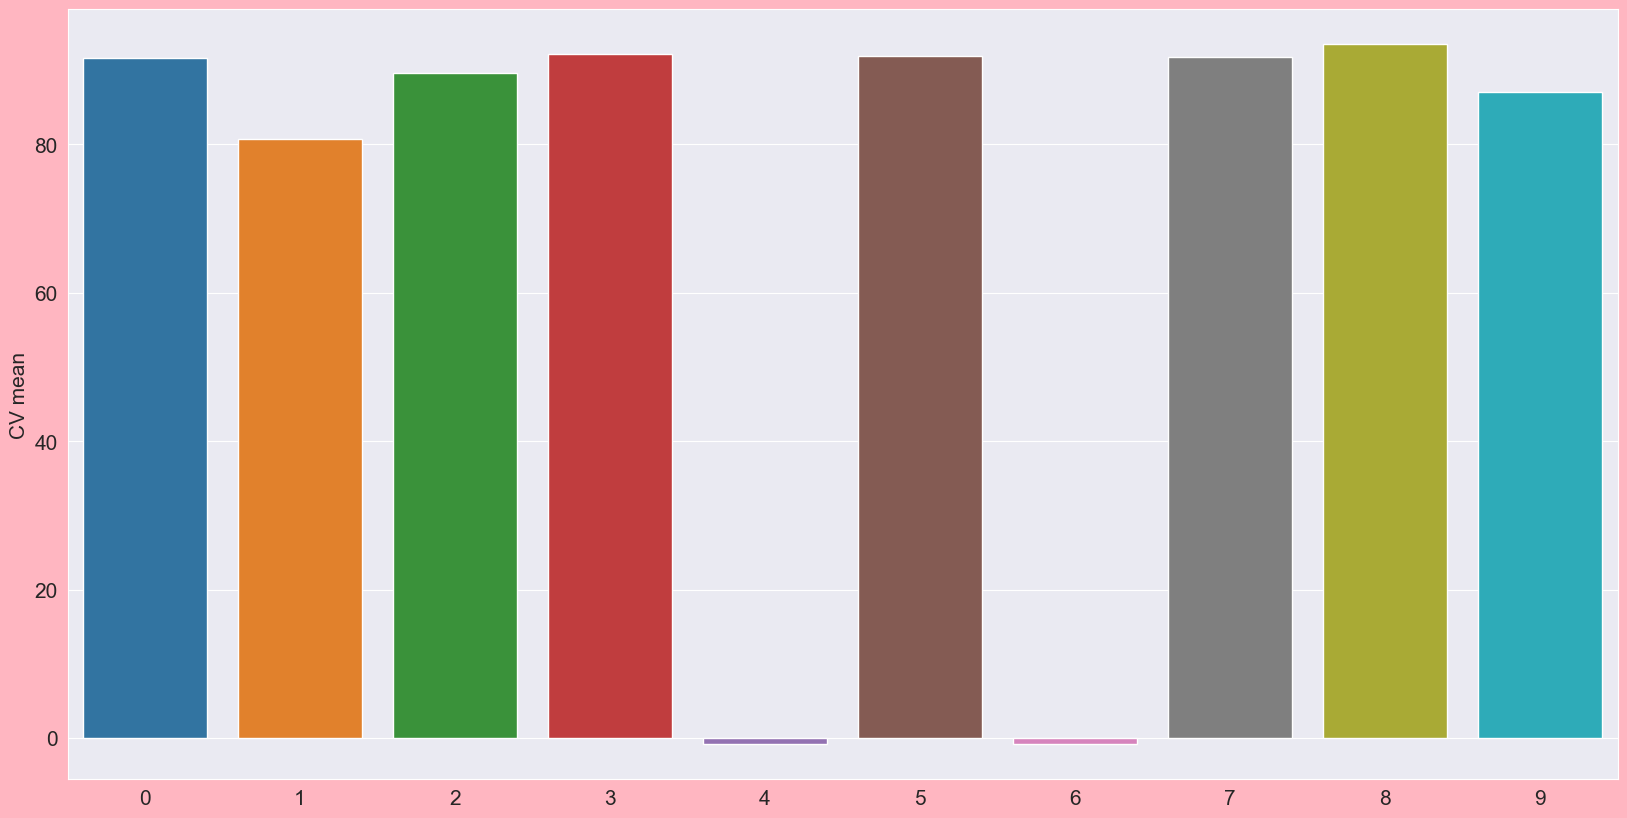

In [87]:
plt.figure(figsize=(20,10))
sns.barplot(y=represent['CV mean'],x=represent.index,data=represent)

<Axes: ylabel='difference btw r2 and cv'>

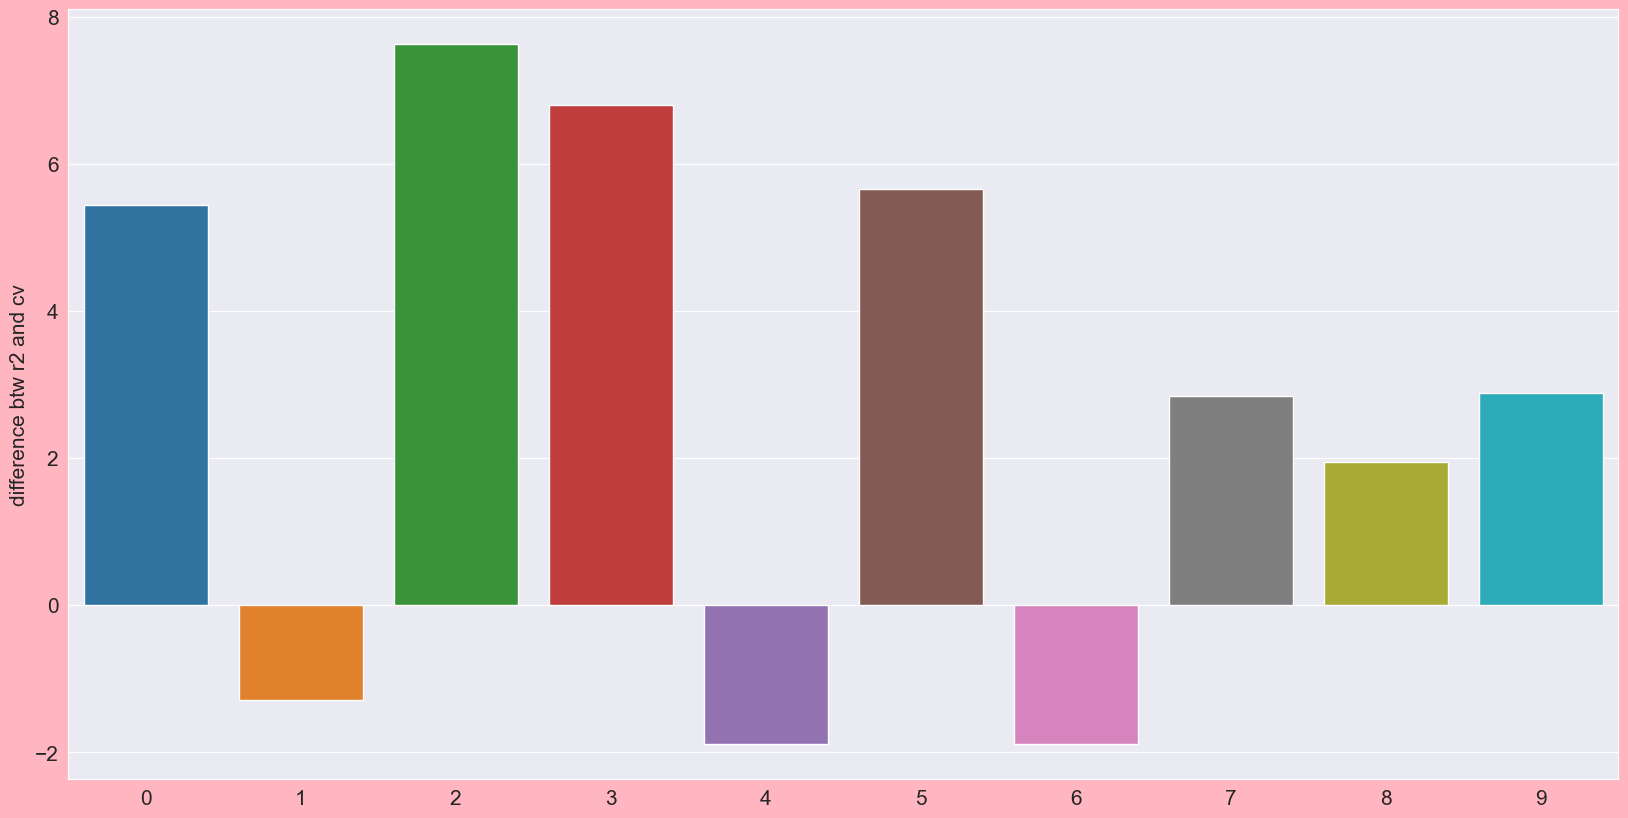

In [88]:
plt.figure(figsize=(20,10))
sns.barplot(y=represent['difference btw r2 and cv'],x=represent.index,data=represent)

### Hyper Parameter Tuning

In [89]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[100,500,1000],
            'learning_rate':[.001,0.01,.1],
            'max_depth':[1,2,3,4],
            'subsample':[.5,.75,1],
            'random_state':[1,2,3]}
GCV=GridSearchCV(GBR,parameters)
GCV.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 500, 1000],
                         'random_state': [1, 2, 3],
                         'subsample': [0.5, 0.75, 1]})

In [90]:
best_parameters = GCV.best_params_
print(best_parameters)
best_result=GCV.best_score_
print(best_result)

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000, 'random_state': 3, 'subsample': 0.5}
0.9384245876050045


In [91]:
Final_model=GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=4, subsample=0.5, random_state = 3)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
print("R2 Score: ", r2_score(y_test,pred))
print('Absolute mean error: ',mean_absolute_error(y_test, pred))
print('Average Squared Error: ',mean_squared_error(y_test, pred))
print('Error in Root Mean Squares: ',np.sqrt(mean_squared_error(y_test, pred)))

R2 Score:  0.9791470129405917
Absolute mean error:  0.06383730427366582
Average Squared Error:  0.007530734329617761
Error in Root Mean Squares:  0.08677980369658461


## Saving The Model

In [92]:
import pickle
filename='StudentGrades.pkl'
pickle.dump(Final_model,open(filename,'wb'))

In [93]:
loaded_model=pickle.load(open('StudentGrades.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

97.91470129405917


In [94]:
prediction=loaded_model.predict(x_test)
a=np.array(y_test)
df4=pd.DataFrame()
df4["Predicted"]=prediction
df4["Original"] = a
df4

Predicted  Original
0     3.748773     3.721
1     3.826923     3.873
2     3.179090     3.290
3     3.116225     3.137
4     2.338345     2.352
..         ...       ...
167   2.676454     2.659
168   3.744999     3.679
169   2.940496     2.917
170   3.221046     3.226
171   3.190214     3.318

[172 rows x 2 columns]

# Thank You